# EDA

We had performed Data Scrapping, Data Cleaning and Data Engineering/Grouping to create a database, steam_db, with the following schema as follows. Diagram created using https://dbdiagram.io/home

![schema](../images/schema.png)


Now, we will perform EDA on our data.

---

## Import Libraries

In this section, we will import all the libraries that will be used in this notebook.

In [1]:
# For Calculation and Data Manipulation
import numpy as np
import pandas as pd
import math

# for data visualisation
# from pandas_profiling import ProfileReport # need downgrade pandas to 1.2.x
import matplotlib.pyplot as plt
import seaborn as sns

# for pca calculation
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# for random numbers generation
import random

# For file exportion folder creation
import os

# for datetime conversion
import datetime

# for data storing
import sqlite3

# import created data
from utils import multiple_histogram, plot_heatmap

# this setting widens how many characters pandas will display in a column:
pd.options.display.max_colwidth = 400

# this setting allows us to see up to 50 columns
pd.options.display.max_columns = 50

---

## Functions

In this section, we will list down all the functions that are being used in the notebook as a summary. The functions can be found in [utils.py](./utils.py).

1. `plot_heatmap` : plot heatmap of correlation
2. `multiple_histogram` : plot multiple histogram

---

## Read data file

First, we will connect to the database. 

In [2]:
# connecting to DB file
con = sqlite3.connect('../data/steam_db.db')

In [3]:
# ensure that connection is establish
sql_query = '''
SELECT *
FROM main
LIMIT 5
'''

pd.read_sql(sql_query, con)

,steam_appid,name,release_date,type,developer,publisher,num_packages
0,10.0,Counter-Strike,2000-11-01 00:00:00,game,Valve,Valve,2
1,20.0,Team Fortress Classic,1999-04-01 00:00:00,game,Valve,Valve,1
2,30.0,Day of Defeat,2003-05-01 00:00:00,game,Valve,Valve,1
3,40.0,Deathmatch Classic,2001-06-01 00:00:00,game,Valve,Valve,1
4,50.0,Half-Life: Opposing Force,1999-11-01 00:00:00,game,Gearbox Software,Valve,1


In [4]:
# get all tables 
sql_query = '''
SELECT name 
FROM sqlite_master 
WHERE type= "table"
'''

pd.read_sql(sql_query, con)

,name
0,genre_mapping
1,main
2,genre
3,categories
4,categories_mapping
5,description
6,price
7,statistics
8,media
9,requirements


We see that we have the following tables within our database.
1. main
2. genre
3. genre_mapping
4. categories
5. categories_mapping
6. description
7. price
8. statistics
9. media
10. requirements
11. tag
12. language
13. support_info

In [5]:
# see column names
sql_query = '''
PRAGMA table_info(main);
'''

pd.read_sql(sql_query, con)

,cid,name,type,notnull,dflt_value,pk
0,0,steam_appid,REAL,0,None,0
1,1,name,TEXT,0,None,0
2,2,release_date,TIMESTAMP,0,None,0
3,3,type,TEXT,0,None,0
4,4,developer,TEXT,0,None,0
5,5,publisher,TEXT,0,None,0
6,6,num_packages,INTEGER,0,None,0


### Combining all tables

In [6]:
# create list of all table names
# list_table_names = ['main', 'genre', 'genre_mapping', 'categories', 'categories_mapping', 'description', 'price', 
#                     'statistics', 'media', 'requirements', 'tag', 'language', 'support_info']

# create list of all table names containing "steam_appid" column
# list_subtable_names = ['main', 'genre', 'categories', 'description', 'price', 
#                     'statistics', 'media', 'requirements', 'tag', 'language', 'support_info']

# list_df_names = ['df_main', 'df_genre', 'df_genre_mapping', 'df_categories', 'df_categories_mapping', 'df_description', 'df_price', 
#                  'df_statistics', 'df_media', 'df_requirements', 'df_tag', 'df_language', 'df_support_info']

In [7]:
# creating dataframes
# sql_query = """SELECT * FROM """

# temp list
# list_df_temp = []

# loop to create dataframes
# for i in range(len(list_subtable_names)):
#     list_df_temp.append(pd.read_sql(sql_query+list_subtable_names[i], con))

In [8]:
# dataframe to store all columns
# df_all = list_df_temp[0] 

# for i in range(1, len(list_df_temp)):
#     # print(i, list_df_temp[i].columns)
#     df_all = df_all.join(list_df_temp[i].set_index("steam_appid"), on="steam_appid")

In [9]:
# print(df_all.shape)
# df_all.head(2)

By running the above codes, we will create created a dataframe containing the all columns from all the tables that we have. We will see that a total of 577 columns will be found within the data and we were not able to use pandas profiling to do a preliminary lookthrough on all of the data.

### Pandas Profiling

In [10]:
#%%time

# create output using pandas profiling
# prof = ProfileReport(df_all, minimal=True)
# prof.to_file(output_file='../data/output_pp.html')

# create report using pandas profiling
# prof = ProfileReport(df_all)
# prof

In [11]:
# unable to load file, do not run code block
# %%time
# https://github.com/ydataai/pandas-profiling/issues/791
# create output using pandas profiling
# prof = ProfileReport(df_all, interactions = {'continuous': False})
# prof.to_file(output_file='../data/output_pp2.html')

---

## Correlation 

Let us take a look at the data's correlation to determine data's relation with each other. We will look within the columns of the same table. 

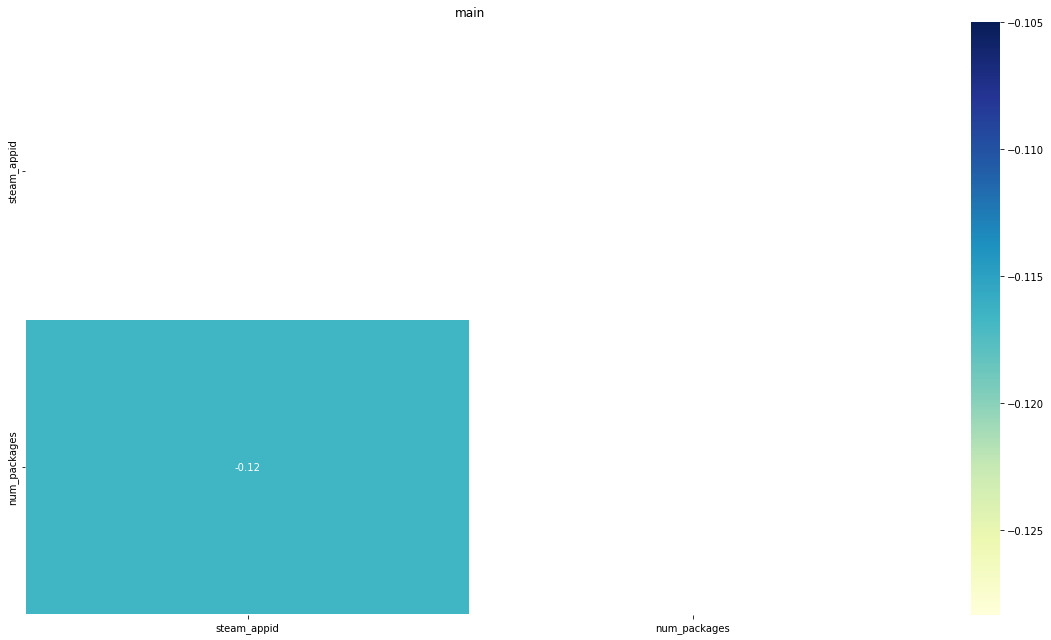

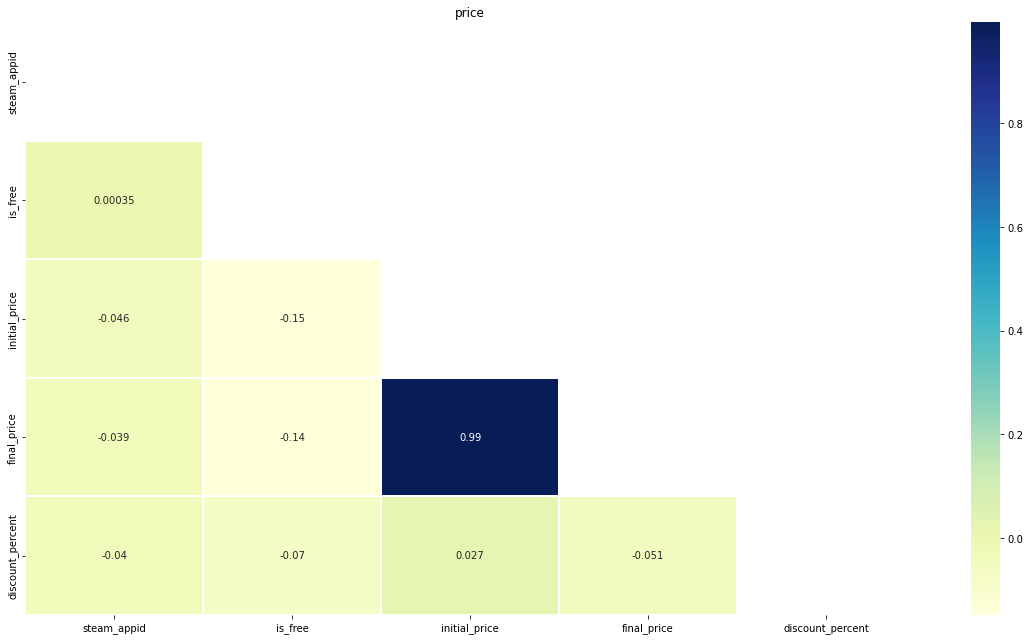

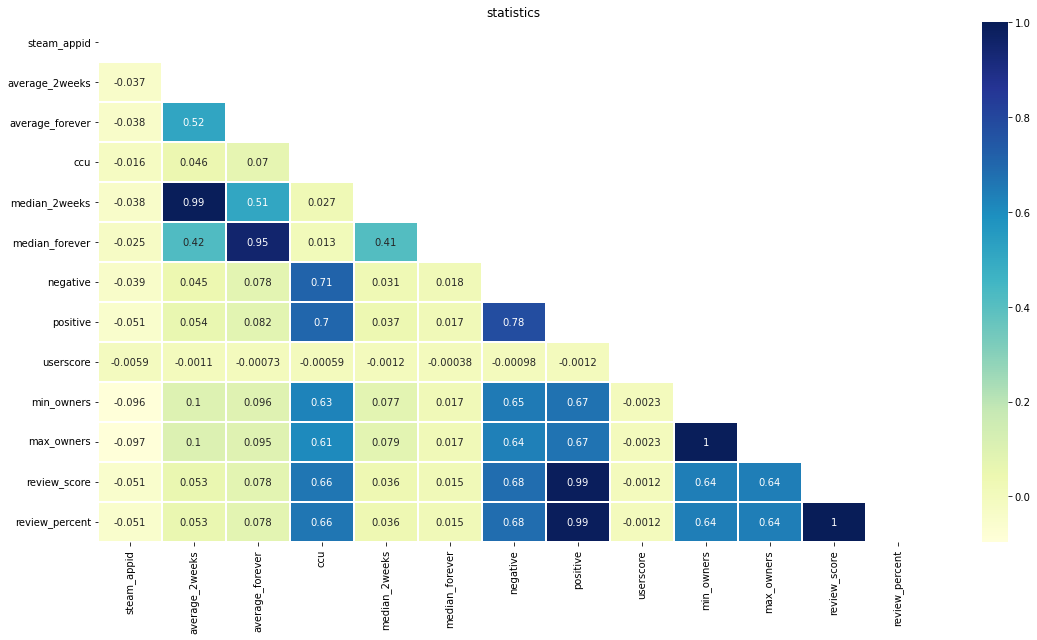

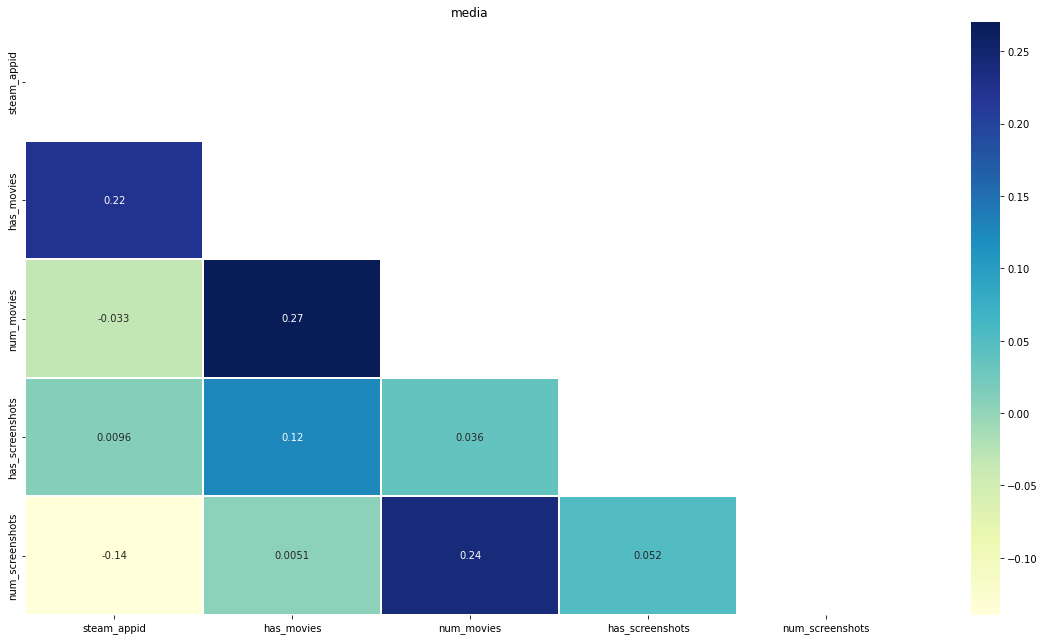

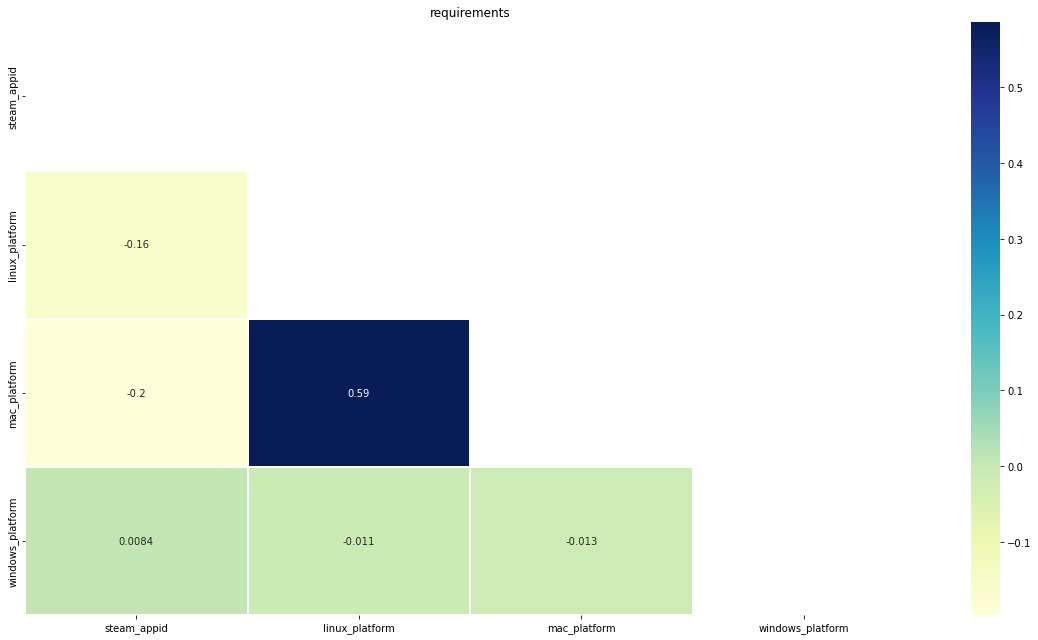

In [12]:
# for tables with lesser columns
sql_query = '''
SELECT *
FROM 
'''
for name in ['main', 'price', 'statistics', 'media', 'requirements']:
    plt.figure(figsize=(16,9))
    plot_heatmap(pd.read_sql(sql_query+name, con), name)

### `price`

- High Correlation : initial price and final price : Expected as final price is initial price subtract discount amount (if any).

### `statistics`
- High Correlation : median 2weeks and average 2weeks : Expected as both are similar statistic of the playtime
- High Correlation : median forever and average forever: Expected as both are similar statistic of the playtime
- Slight High Correlation : positive and negative : Not expected for the number of positive and negative reviews to have relationship. 
- Slight High Correlation : ccu with [positive, negative, minimum owners, maximum owners, review score, review score percent] : Expected as CCU is the number of concurrent users on the day before the date of scrap.
- Slight High Correlation : negative with [minimum owners, maximum owners] : Expected
- Slight High Correlation : negative with [review score, review score percent] : Not Expected
- Slight High Correlation : positive with [minimum owners, maximum owners, review score, review score percent] : Expected
- High Correlation : positive with [review score, review score percent] : Expected
- Correlation of 1 : minimum owner and maximum owner : Not expected
- Slight High Correlation : [review score, review score percent] with [minimum owners, maximum owners] : Expected
- Correlation of 1 : review score and review score percent : Expected

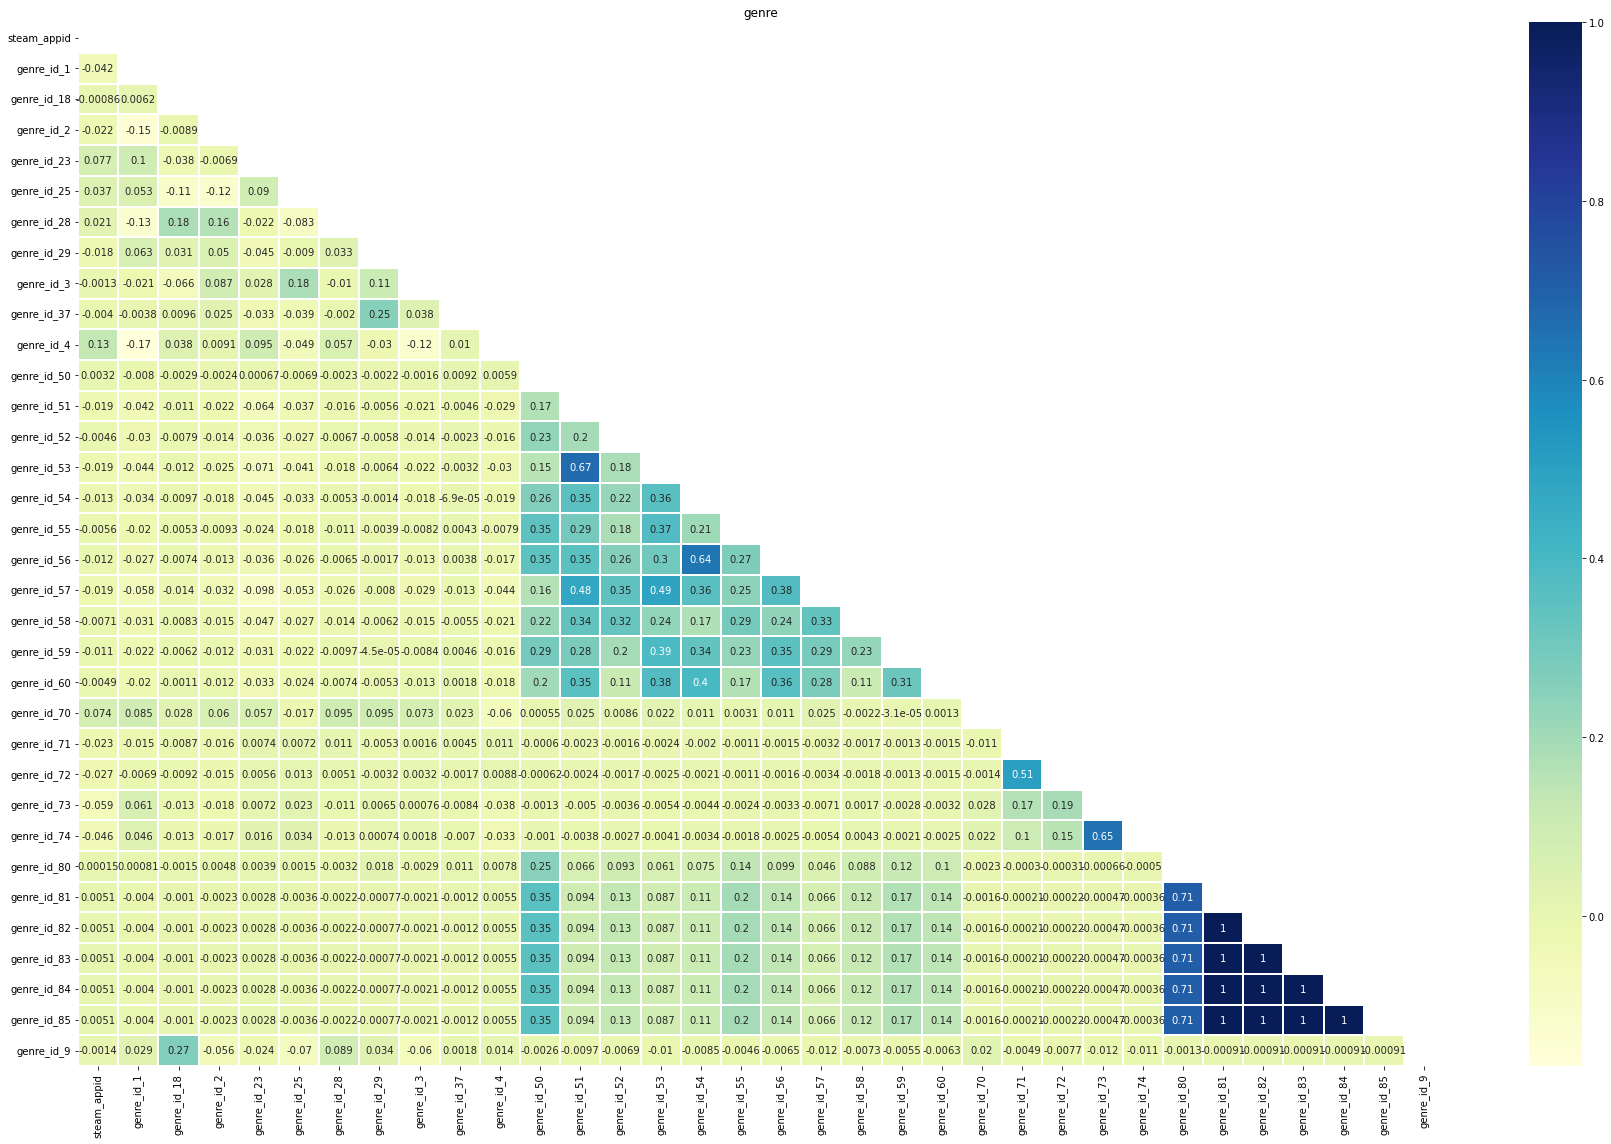

In [13]:
sql_query = '''
SELECT *
FROM genre
'''

plt.figure(figsize=(25,16))
plot_heatmap(pd.read_sql(sql_query, con), 'genre')

### `genre`

- Slight High Correlation : 53 and 51 : Design & Illustration and Animation & Modeling
- Slight High Correlation : 54 and 56 : Education and Software Training
- Slight High Correlation : 73 and 74 : Violent and Gore
- Slight High Correlation : 80 and [81, 82, 83, 84, 85] : Movie and [Documentary, Episodic, Short, Tutorial, 360 Video]
- Correlation of 1 : [81, 82, 83, 84, 85] : [Documentary, Episodic, Short, Tutorial, 360 Video]

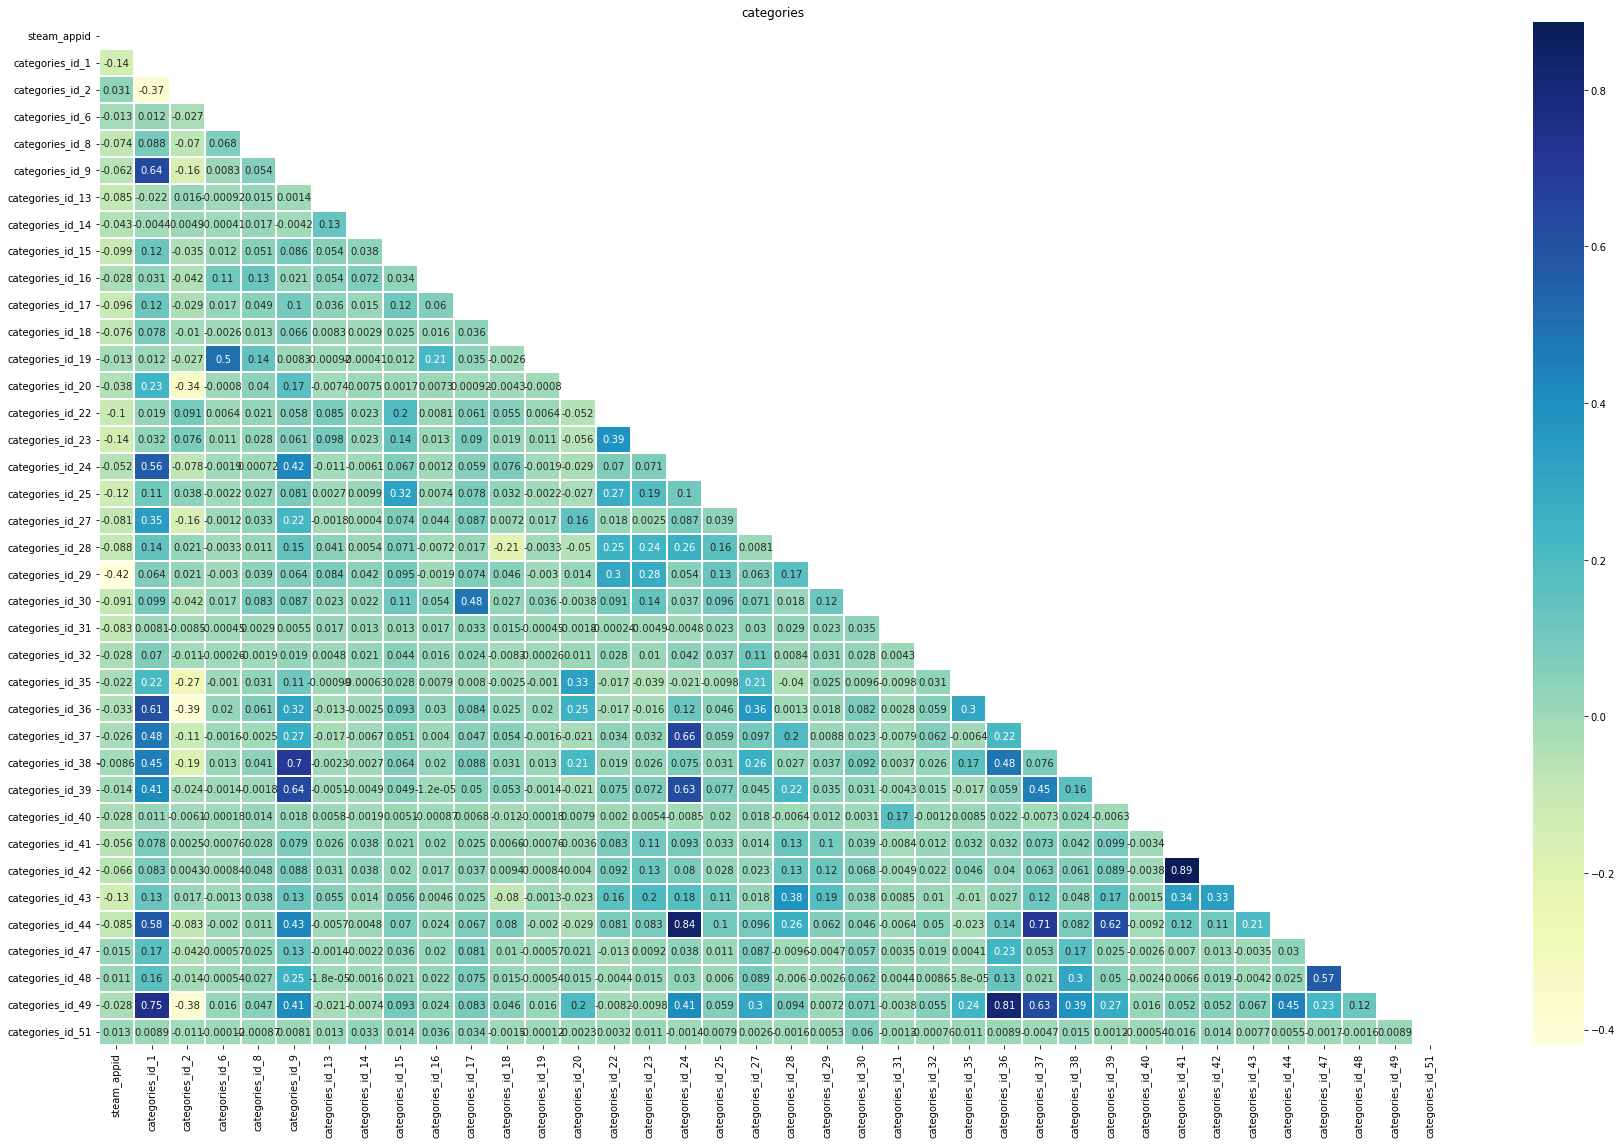

In [14]:
sql_query = '''
SELECT *
FROM categories
'''

plt.figure(figsize=(25,16))
plot_heatmap(pd.read_sql(sql_query, con), 'categories')

### `categories`

- Slight High Correlation : 1 with [9, 36, 49] : Multi-player, [PvP, Online PvP, Co-op]
- Slight High Correlation : 9 with [38, 39] : PvP, [Online Co-op, Shared/Split Screen Co-op]
- Slight High Correlation : 24 with [37, 39] : Shared/Split Screen, [Shared/Split Screen PvP, Shared/Split Screen Co-op]
- High Correlation : 24 with 44 : Shared/Split Screen, Remote Play Together
- High Correlation : 36 with 49 : Online PvP, Co-op
- Slight High Correlation : 37 with [44, 49] : Shared/Split Screen, [Remote Play Together, Co-op]
- High Correlation : 41 with 42 : Remote Play on Phone, Remote Play on Tablet

### `tag`

We see that tag has too many columns to perform correlation calculation. We will skip calculation of the correlation for this. 

---

## Analysis

Let us look at the entire data in terms of the tables. 

### `main`

We will look at the games in terms of publishers. 

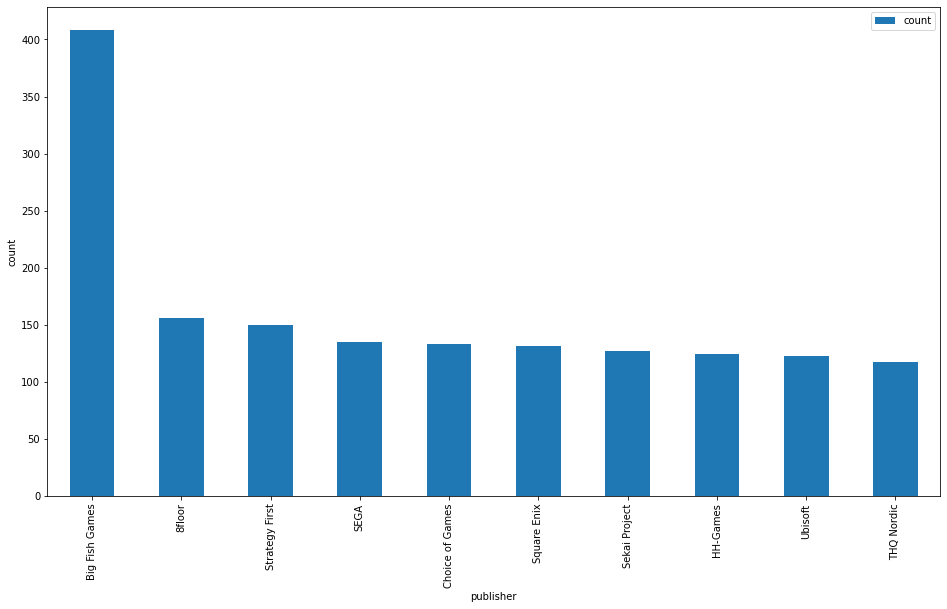

In [15]:
sql_query = '''
SELECT count(*) AS count, publisher
FROM main
GROUP BY publisher
ORDER BY count(*) DESC
LIMIT 10
'''

ax = plt.figure(figsize=(16,9))
ax = pd.read_sql(sql_query, con)['count'].plot(kind='bar', xlabel='publisher', ylabel='count', legend=True)
ax.set_xticklabels(pd.read_sql(sql_query, con)['publisher']);

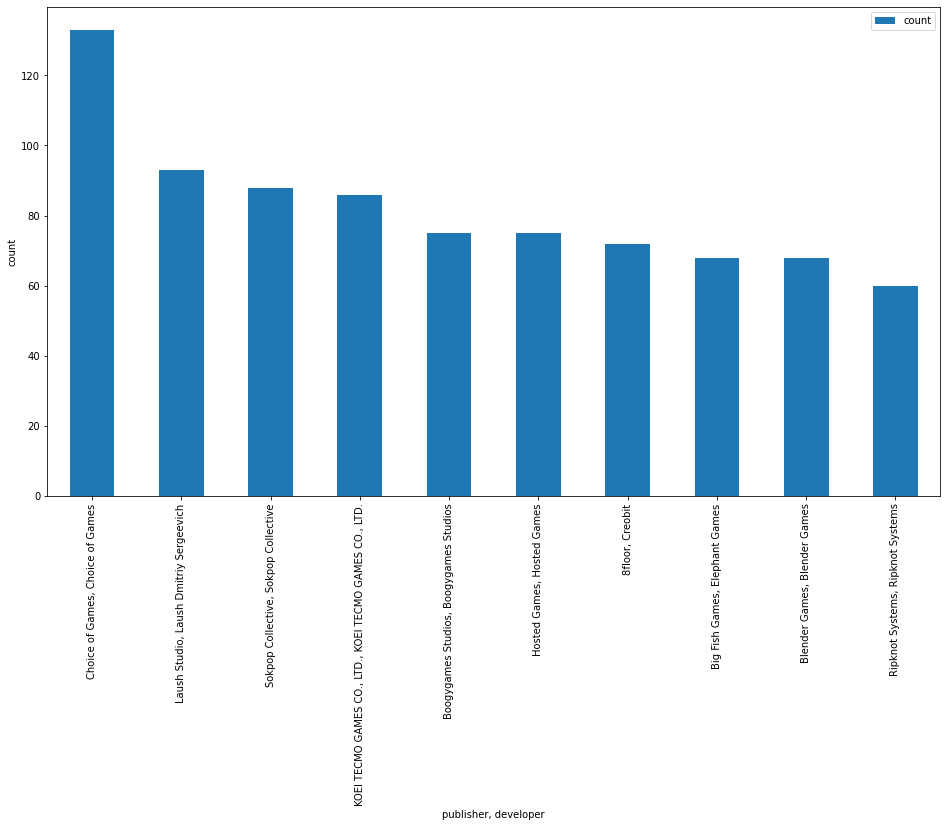

In [16]:
sql_query = '''
SELECT count(*) AS count, publisher, developer
FROM main
GROUP BY publisher, developer
ORDER BY count(*) DESC
LIMIT 10
'''

ax = plt.figure(figsize=(16,9))
ax = pd.read_sql(sql_query, con)['count'].plot(kind='bar', xlabel='publisher, developer', ylabel='count', legend=True)
ax.set_xticklabels(pd.read_sql(sql_query, con)['publisher']+', '+pd.read_sql(sql_query, con)['developer']);

We see the top 10 developers/publisher for the sameple steam games that we have on hand. We see that if we just based on publisher, the data represented is different, with `Choice of Games` having more games release with the same developer, while `Big Fish Games` had released more games. 

### `genre`

We will look at the game genres now. 

In [17]:
sql_query = '''
SELECT *
FROM genre
LIMIT 5
'''

pd.read_sql(sql_query, con)

,steam_appid,genre_id,genre,genre_id_1,genre_id_18,genre_id_2,genre_id_23,genre_id_25,genre_id_28,genre_id_29,genre_id_3,genre_id_37,genre_id_4,genre_id_50,genre_id_51,genre_id_52,genre_id_53,genre_id_54,genre_id_55,genre_id_56,genre_id_57,genre_id_58,genre_id_59,genre_id_60,genre_id_70,genre_id_71,genre_id_72,genre_id_73,genre_id_74,genre_id_80,genre_id_81,genre_id_82,genre_id_83,genre_id_84,genre_id_85,genre_id_9
0,10.0,1,Action,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,20.0,1,Action,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,30.0,1,Action,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,40.0,1,Action,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,50.0,1,Action,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


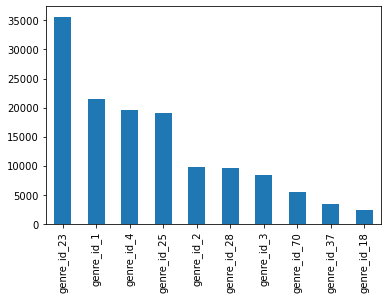

In [19]:
sql_query = '''
SELECT *
FROM genre
'''

# see top 10 languages
pd.DataFrame(pd.read_sql(sql_query, con).drop(columns={'steam_appid', 'genre_id', 'genre'}).sum()).sort_values(by=0, ascending=False).head(10).plot(kind='bar', legend=False);

To understand which genre has the number of games, we can use the `genre mapping` table. We see that Indie (genre_id_23) has the most number of games, followed by Action (genre_id_1) and Casual (genre_id_4).

For our analysis, we will also look at genre with high correlation on the entire dataset. 

In [20]:
sql_query = '''
SELECT *
FROM genre_mapping
'''

pd.read_sql(sql_query, con).sort_values(by='id')

,id,description
0,1,Action
1,18,Sports
2,2,Strategy
3,23,Indie
4,25,Adventure
5,28,Simulation
6,29,Massively Multiplayer
7,3,RPG
8,37,Free to Play
9,4,Casual


In [21]:
sql_query = '''
SELECT count(*) AS count
FROM genre
GROUP BY 
'''

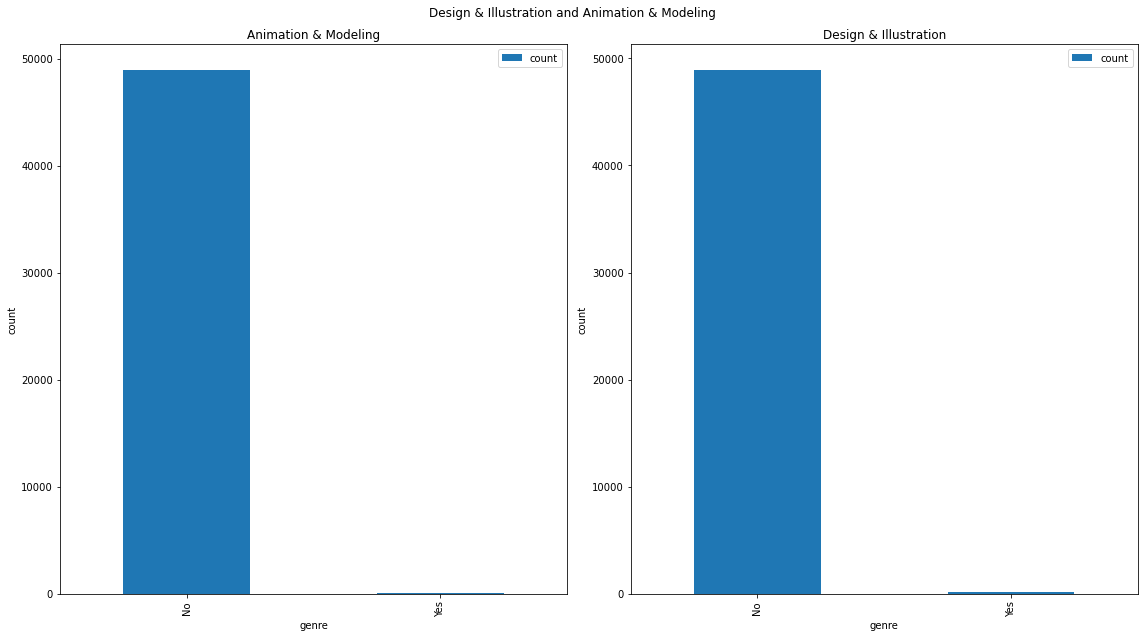

In [22]:
# Slight High Correlation : 53 and 51 : Design & Illustration and Animation & Modeling
fig, axes = plt.subplots(1, 2, figsize=(16,9))
fig.suptitle('Design & Illustration and Animation & Modeling')

pd.read_sql(sql_query+'genre_id_51', con).plot(ax = axes[0], kind='bar', xlabel='genre', ylabel='count', legend=True)
axes[0].set_title('Animation & Modeling')
axes[0].set_xticklabels(['No', 'Yes'])

pd.read_sql(sql_query+'genre_id_53', con).plot(ax = axes[1], kind='bar', xlabel='genre', ylabel='count', legend=True);
axes[1].set_title('Design & Illustration')
axes[1].set_xticklabels(['No', 'Yes'])

# adjust the graph layout
plt.tight_layout() 
    
# show the graph
plt.show();

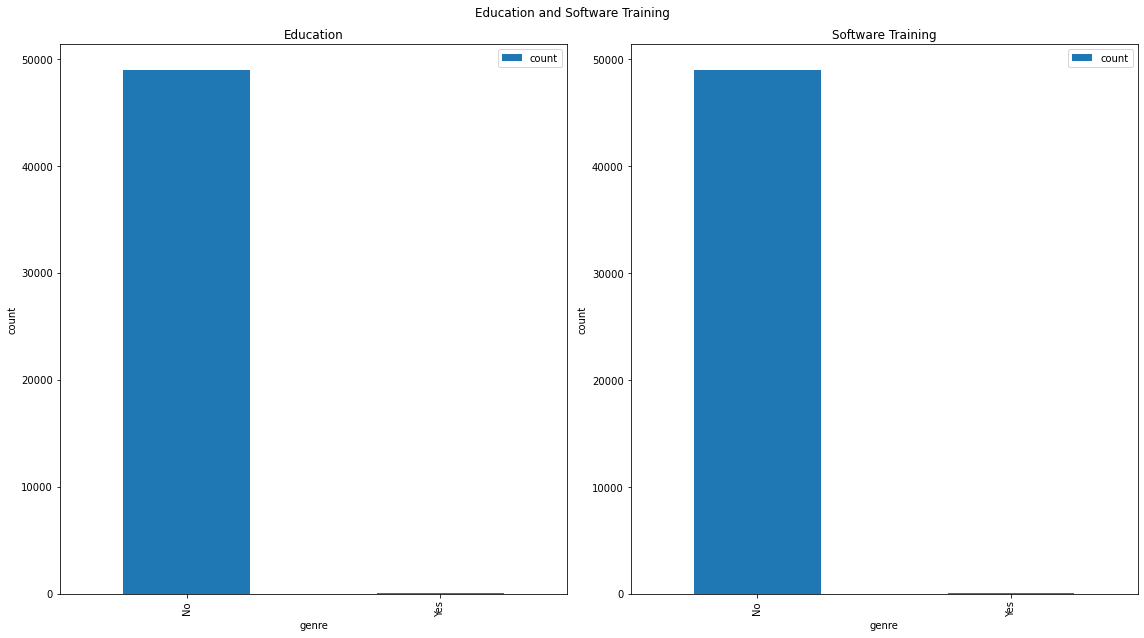

In [23]:
# Slight High Correlation : 54 and 56 : Education and Software Training
fig, axes = plt.subplots(1, 2, figsize=(16,9))
fig.suptitle('Education and Software Training')

pd.read_sql(sql_query+'genre_id_54', con).plot(ax = axes[0], kind='bar', xlabel='genre', ylabel='count', legend=True)
axes[0].set_title('Education')
axes[0].set_xticklabels(['No', 'Yes'])

pd.read_sql(sql_query+'genre_id_56', con).plot(ax = axes[1], kind='bar', xlabel='genre', ylabel='count', legend=True);
axes[1].set_title('Software Training')
axes[1].set_xticklabels(['No', 'Yes'])

# adjust the graph layout
plt.tight_layout() 
    
# show the graph
plt.show();

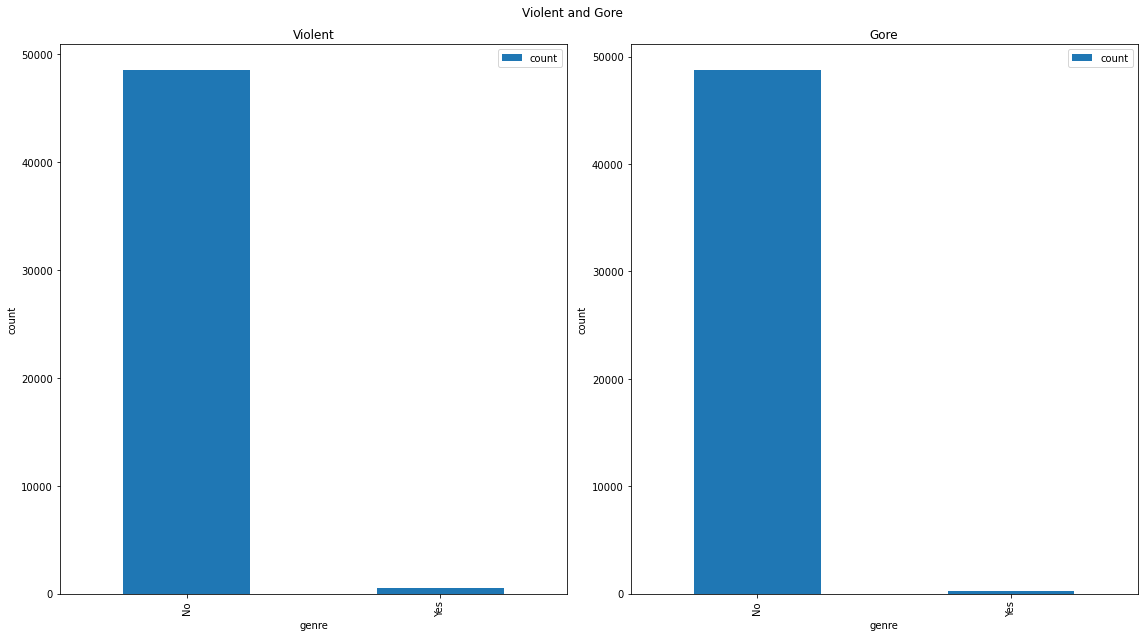

In [24]:
# Slight High Correlation : 73 and 74 : Violent and Gore
fig, axes = plt.subplots(1, 2, figsize=(16,9))
fig.suptitle('Violent and Gore')

pd.read_sql(sql_query+'genre_id_73', con).plot(ax = axes[0], kind='bar', xlabel='genre', ylabel='count', legend=True)
axes[0].set_title('Violent')
axes[0].set_xticklabels(['No', 'Yes'])

pd.read_sql(sql_query+'genre_id_74', con).plot(ax = axes[1], kind='bar', xlabel='genre', ylabel='count', legend=True);
axes[1].set_title('Gore')
axes[1].set_xticklabels(['No', 'Yes'])

# adjust the graph layout
plt.tight_layout() 
    
# show the graph
plt.show();

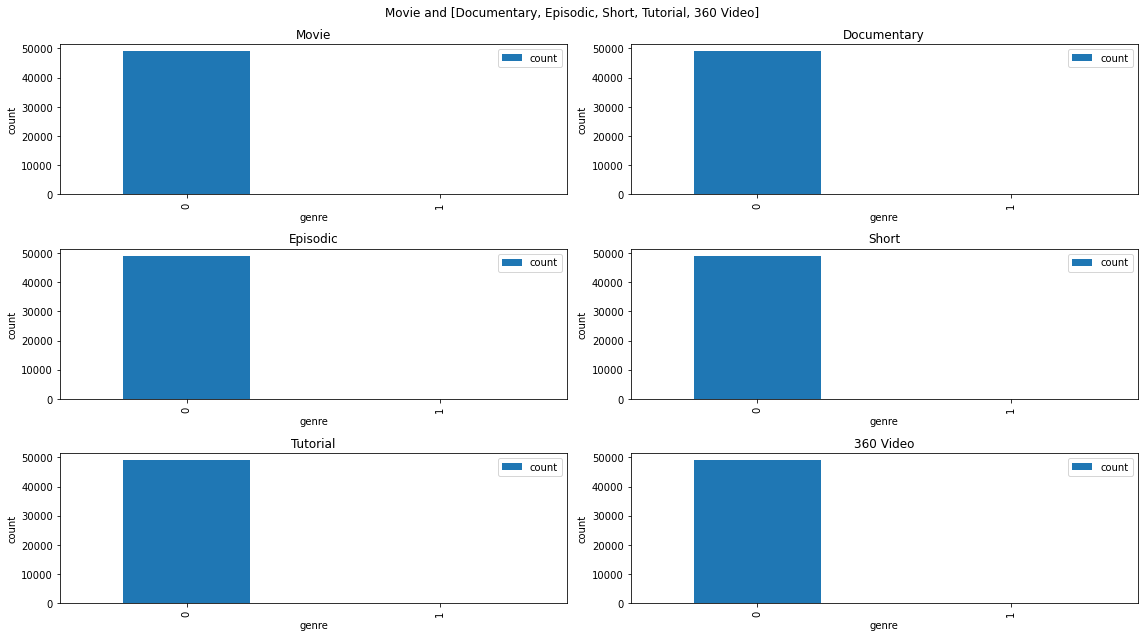

In [25]:
# Slight High Correlation : 80 and [81, 82, 83, 84, 85] : Movie and [Documentary, Episodic, Short, Tutorial, 360 Video]
# Correlation of 1 : [81, 82, 83, 84, 85] : [Documentary, Episodic, Short, Tutorial, 360 Video]
fig, axes = plt.subplots(3, 2, figsize=(16,9))
fig.suptitle('Movie and [Documentary, Episodic, Short, Tutorial, 360 Video]')

pd.read_sql(sql_query+'genre_id_80', con).plot(ax = axes[0,0], kind='bar', xlabel='genre', ylabel='count', legend=True)
axes[0,0].set_title('Movie')

pd.read_sql(sql_query+'genre_id_81', con).plot(ax = axes[0,1], kind='bar', xlabel='genre', ylabel='count', legend=True);
axes[0,1].set_title('Documentary')

pd.read_sql(sql_query+'genre_id_82', con).plot(ax = axes[1,0], kind='bar', xlabel='genre', ylabel='count', legend=True)
axes[1,0].set_title('Episodic')

pd.read_sql(sql_query+'genre_id_83', con).plot(ax = axes[1,1], kind='bar', xlabel='genre', ylabel='count', legend=True);
axes[1,1].set_title('Short')

pd.read_sql(sql_query+'genre_id_84', con).plot(ax = axes[2,0], kind='bar', xlabel='genre', ylabel='count', legend=True)
axes[2,0].set_title('Tutorial')

pd.read_sql(sql_query+'genre_id_85', con).plot(ax = axes[2,1], kind='bar', xlabel='genre', ylabel='count', legend=True);
axes[2,1].set_title('360 Video')

# adjust the graph layout
plt.tight_layout() 
    
# show the graph
plt.show();

We see that for majority of the data plotted, most of the data lies on the `No` value, suggesting these genres are of the minority of the games. 

### `categories`

We will now look at the categories. 

In [26]:
sql_query = '''
SELECT *
FROM categories
LIMIT 5
'''

pd.read_sql(sql_query, con)

,steam_appid,categories_id,categories_description,categories_id_1,categories_id_2,categories_id_6,categories_id_8,categories_id_9,categories_id_13,categories_id_14,categories_id_15,categories_id_16,categories_id_17,categories_id_18,categories_id_19,categories_id_20,categories_id_22,categories_id_23,categories_id_24,categories_id_25,categories_id_27,categories_id_28,categories_id_29,categories_id_30,categories_id_31,categories_id_32,categories_id_35,categories_id_36,categories_id_37,categories_id_38,categories_id_39,categories_id_40,categories_id_41,categories_id_42,categories_id_43,categories_id_44,categories_id_47,categories_id_48,categories_id_49,categories_id_51
0,10.0,"1,49,36,37,8","Multi-player,PvP,Online PvP,Shared/Split Screen PvP,Valve Anti-Cheat enabled",1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0
1,20.0,"1,49,36,37,8,44","Multi-player,PvP,Online PvP,Shared/Split Screen PvP,Valve Anti-Cheat enabled,Remote Play Together",1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0
2,30.0,"1,8","Multi-player,Valve Anti-Cheat enabled",1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,40.0,"1,49,36,37,8,44","Multi-player,PvP,Online PvP,Shared/Split Screen PvP,Valve Anti-Cheat enabled,Remote Play Together",1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0
4,50.0,"2,1,8,44","Single-player,Multi-player,Valve Anti-Cheat enabled,Remote Play Together",1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


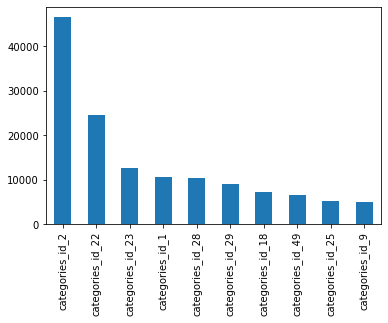

In [27]:
sql_query = '''
SELECT *
FROM categories
'''

# see top 10 languages
pd.DataFrame(pd.read_sql(sql_query, con).drop(columns={'steam_appid', 'categories_id', 'categories_description'}).sum()).sort_values(by=0, ascending=False).head(10).plot(kind='bar', legend=False);

To understand which category has the highest number of games, we can use the `category mapping` table. We see that Single-player (categories_id_2) has the most number of games, followed by Steam Achievements (categories_id_22) and Steam Cloud (categories_id_23).

For our analysis, we will also look at genre with high correlation on the entire dataset. 

In [28]:
sql_query = '''
SELECT *
FROM categories_mapping
'''

pd.read_sql(sql_query, con).sort_values(by='id')

,id,description
0,1,Multi-player
6,2,Single-player
33,6,Mods (require HL2)
4,8,Valve Anti-Cheat enabled
20,9,Co-op
12,13,Captions available
17,14,Commentary available
16,15,Stats
14,16,Includes Source SDK
18,17,Includes level editor


In [29]:
sql_query = '''
SELECT COUNT(*) AS count
FROM categories
GROUP BY 
'''

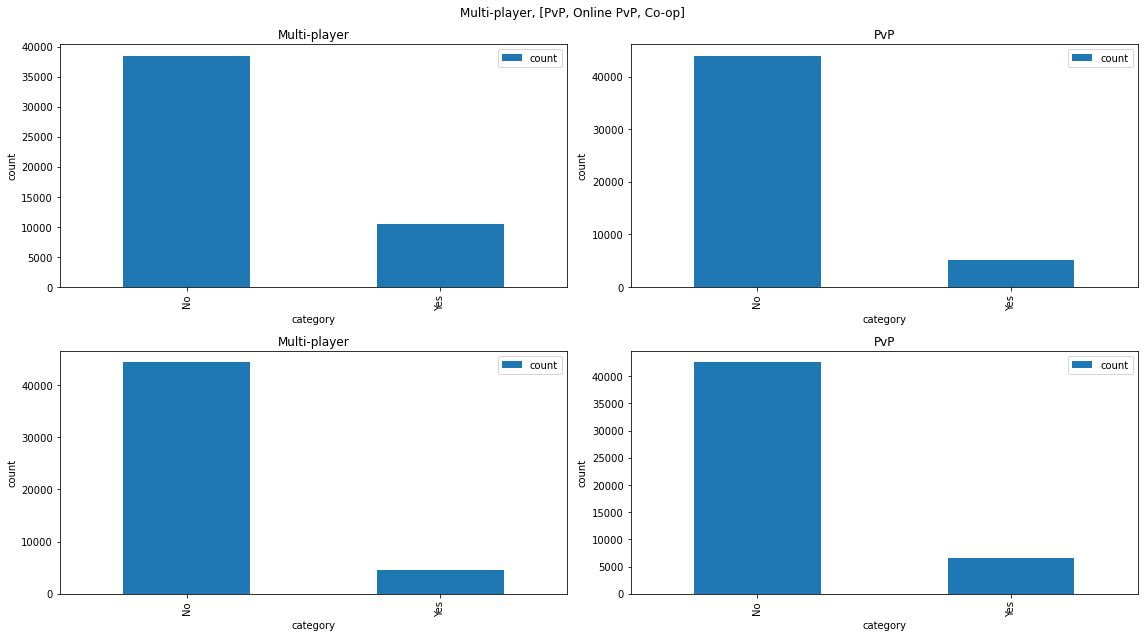

In [30]:
# Slight High Correlation : 1 with [9, 36, 49] : Multi-player, [PvP, Online PvP, Co-op]
fig, axes = plt.subplots(2, 2, figsize=(16,9))
fig.suptitle('Multi-player, [PvP, Online PvP, Co-op]')

pd.read_sql(sql_query+'categories_id_1', con).plot(ax = axes[0,0], kind='bar', xlabel='category', ylabel='count', legend=True)
axes[0,0].set_title('Multi-player')
axes[0,0].set_xticklabels(['No', 'Yes'])

pd.read_sql(sql_query+'categories_id_9', con).plot(ax = axes[0,1], kind='bar', xlabel='category', ylabel='count', legend=True)
axes[0,1].set_title('PvP')
axes[0,1].set_xticklabels(['No', 'Yes'])

pd.read_sql(sql_query+'categories_id_36', con).plot(ax = axes[1,0], kind='bar', xlabel='category', ylabel='count', legend=True)
axes[1,0].set_title('Multi-player')
axes[1,0].set_xticklabels(['No', 'Yes'])

pd.read_sql(sql_query+'categories_id_49', con).plot(ax = axes[1,1], kind='bar', xlabel='category', ylabel='count', legend=True)
axes[1,1].set_title('PvP')
axes[1,1].set_xticklabels(['No', 'Yes'])

# adjust the graph layout
plt.tight_layout() 
    
# show the graph
plt.show();

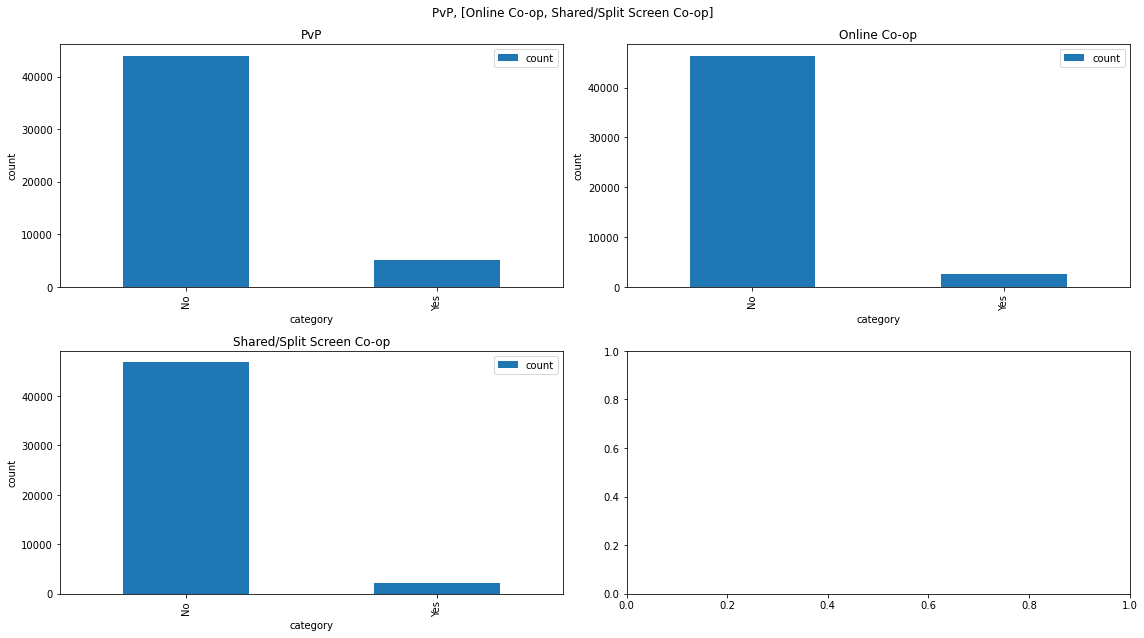

In [31]:
# Slight High Correlation : 9 with [38, 39] : PvP, [Online Co-op, Shared/Split Screen Co-op]
fig, axes = plt.subplots(2, 2, figsize=(16,9))
fig.suptitle('PvP, [Online Co-op, Shared/Split Screen Co-op]')

pd.read_sql(sql_query+'categories_id_9', con).plot(ax = axes[0,0], kind='bar', xlabel='category', ylabel='count', legend=True)
axes[0,0].set_title('PvP')
axes[0,0].set_xticklabels(['No', 'Yes'])

pd.read_sql(sql_query+'categories_id_38', con).plot(ax = axes[0,1], kind='bar', xlabel='category', ylabel='count', legend=True)
axes[0,1].set_title('Online Co-op')
axes[0,1].set_xticklabels(['No', 'Yes'])

pd.read_sql(sql_query+'categories_id_39', con).plot(ax = axes[1,0], kind='bar', xlabel='category', ylabel='count', legend=True)
axes[1,0].set_title('Shared/Split Screen Co-op')
axes[1,0].set_xticklabels(['No', 'Yes'])

# adjust the graph layout
plt.tight_layout() 
    
# show the graph
plt.show();

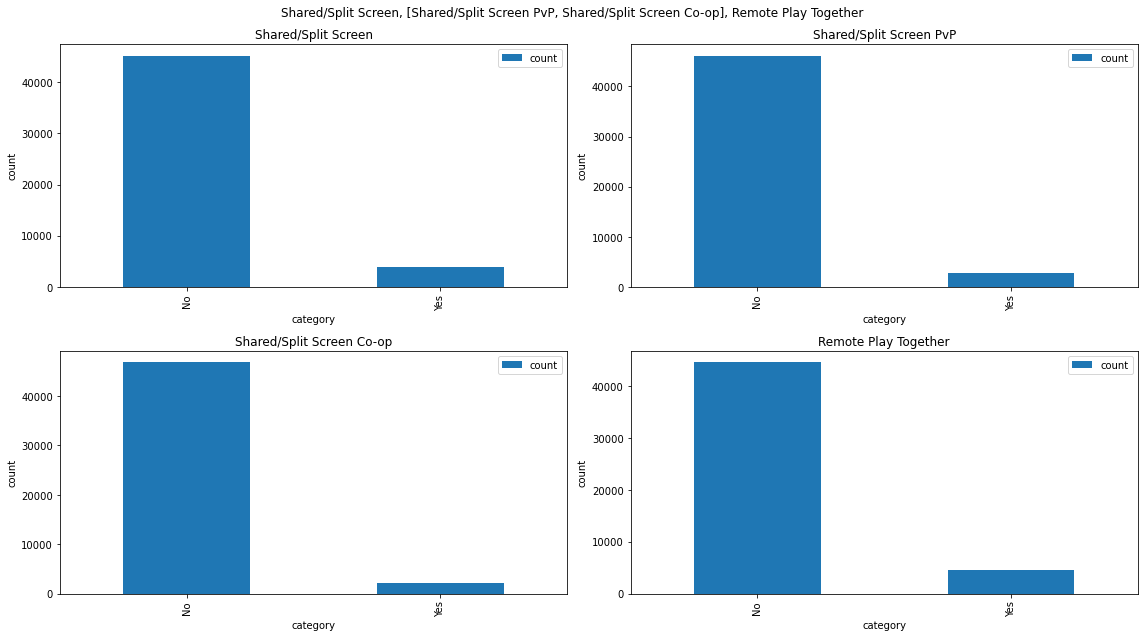

In [32]:
# Slight High Correlation : 24 with [37, 39] : Shared/Split Screen, [Shared/Split Screen PvP, Shared/Split Screen Co-op]
# High Correlation : 24 with 44 : Shared/Split Screen, Remote Play Together
fig, axes = plt.subplots(2, 2, figsize=(16,9))
fig.suptitle('Shared/Split Screen, [Shared/Split Screen PvP, Shared/Split Screen Co-op], Remote Play Together')

pd.read_sql(sql_query+'categories_id_24', con).plot(ax = axes[0,0], kind='bar', xlabel='category', ylabel='count', legend=True)
axes[0,0].set_title('Shared/Split Screen')
axes[0,0].set_xticklabels(['No', 'Yes'])

pd.read_sql(sql_query+'categories_id_37', con).plot(ax = axes[0,1], kind='bar', xlabel='category', ylabel='count', legend=True)
axes[0,1].set_title('Shared/Split Screen PvP')
axes[0,1].set_xticklabels(['No', 'Yes'])

pd.read_sql(sql_query+'categories_id_39', con).plot(ax = axes[1,0], kind='bar', xlabel='category', ylabel='count', legend=True)
axes[1,0].set_title('Shared/Split Screen Co-op')
axes[1,0].set_xticklabels(['No', 'Yes'])

pd.read_sql(sql_query+'categories_id_44', con).plot(ax = axes[1,1], kind='bar', xlabel='category', ylabel='count', legend=True)
axes[1,1].set_title('Remote Play Together')
axes[1,1].set_xticklabels(['No', 'Yes'])

# adjust the graph layout
plt.tight_layout() 
    
# show the graph
plt.show();

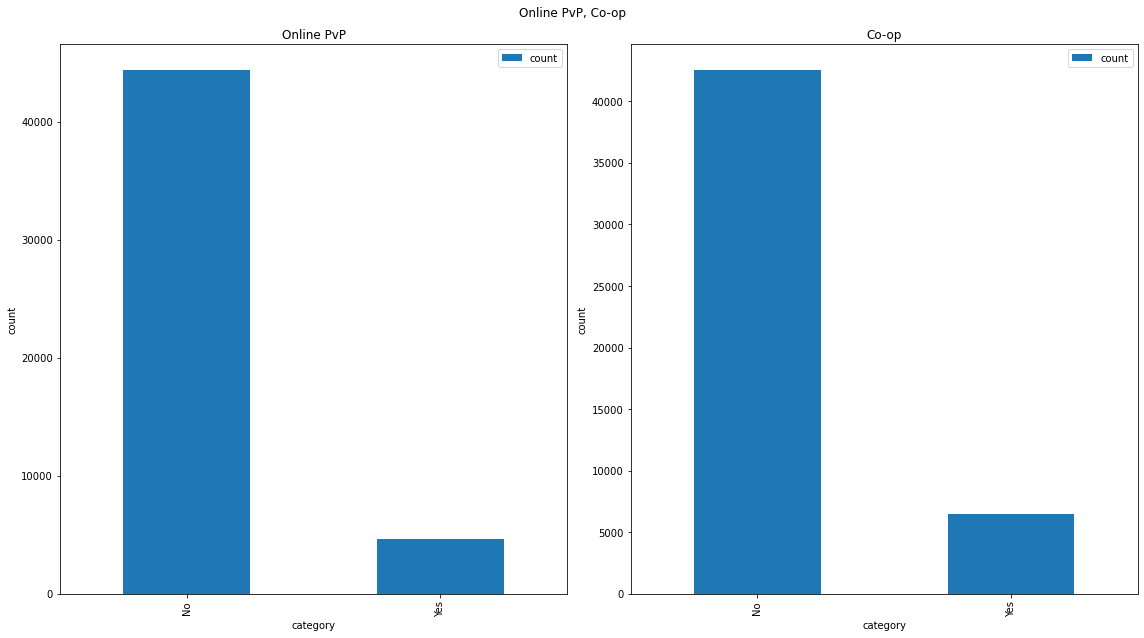

In [33]:
# High Correlation : 36 with 49 : Online PvP, Co-op
fig, axes = plt.subplots(1, 2, figsize=(16,9))
fig.suptitle('Online PvP, Co-op')

pd.read_sql(sql_query+'categories_id_36', con).plot(ax = axes[0], kind='bar', xlabel='category', ylabel='count', legend=True)
axes[0].set_title('Online PvP')
axes[0].set_xticklabels(['No', 'Yes'])

pd.read_sql(sql_query+'categories_id_49', con).plot(ax = axes[1], kind='bar', xlabel='category', ylabel='count', legend=True)
axes[1].set_title('Co-op')
axes[1].set_xticklabels(['No', 'Yes'])

# adjust the graph layout
plt.tight_layout() 
    
# show the graph
plt.show();

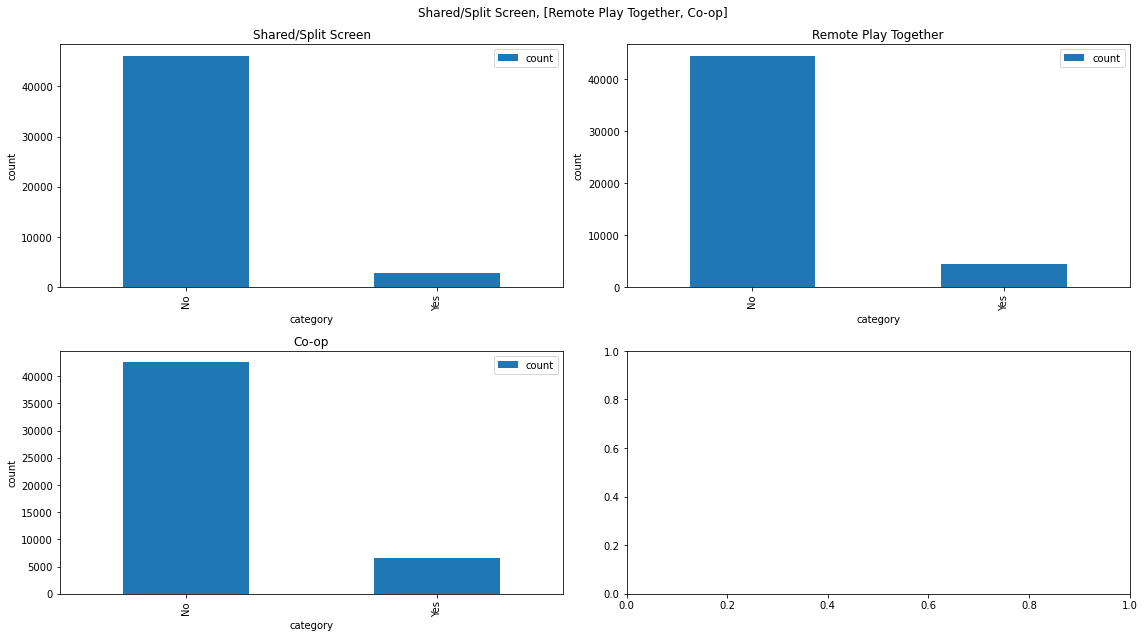

In [34]:
# Slight High Correlation : 37 with [44, 49] : Shared/Split Screen, [Remote Play Together, Co-op]
fig, axes = plt.subplots(2, 2, figsize=(16,9))
fig.suptitle('Shared/Split Screen, [Remote Play Together, Co-op]')

pd.read_sql(sql_query+'categories_id_37', con).plot(ax = axes[0,0], kind='bar', xlabel='category', ylabel='count', legend=True)
axes[0,0].set_title('Shared/Split Screen')
axes[0,0].set_xticklabels(['No', 'Yes'])

pd.read_sql(sql_query+'categories_id_44', con).plot(ax = axes[0,1], kind='bar', xlabel='category', ylabel='count', legend=True)
axes[0,1].set_title('Remote Play Together')
axes[0,1].set_xticklabels(['No', 'Yes'])

pd.read_sql(sql_query+'categories_id_49', con).plot(ax = axes[1,0], kind='bar', xlabel='category', ylabel='count', legend=True)
axes[1,0].set_title('Co-op')
axes[1,0].set_xticklabels(['No', 'Yes'])

# adjust the graph layout
plt.tight_layout() 
    
# show the graph
plt.show();

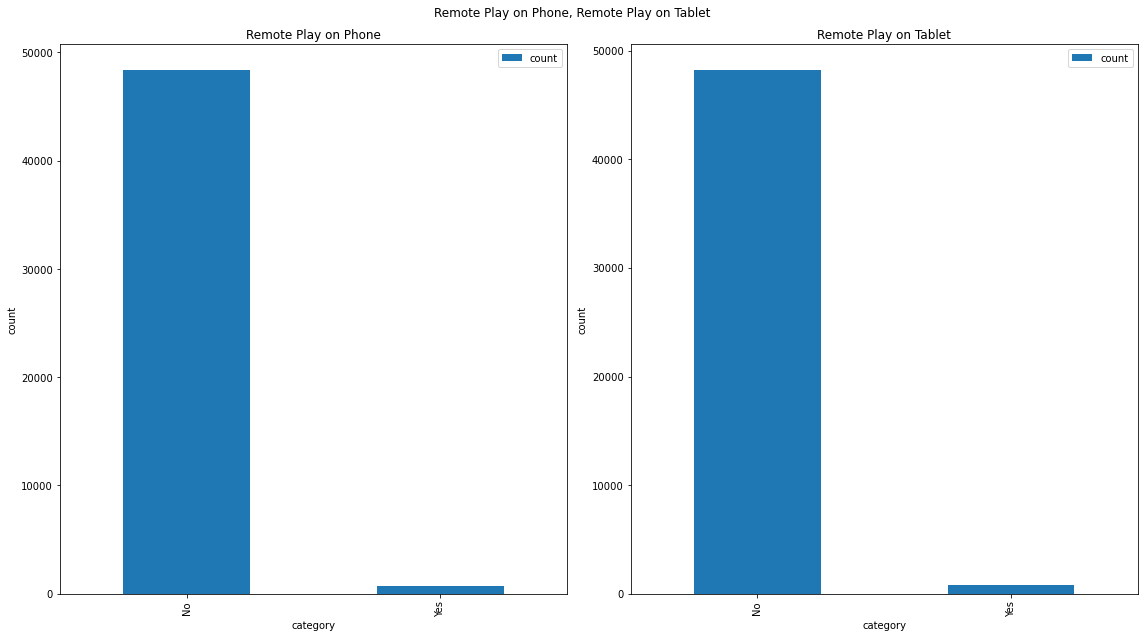

In [35]:
# High Correlation : 41 with 42 : Remote Play on Phone, Remote Play on Tablet
fig, axes = plt.subplots(1, 2, figsize=(16,9))
fig.suptitle('Remote Play on Phone, Remote Play on Tablet')

pd.read_sql(sql_query+'categories_id_41', con).plot(ax = axes[0], kind='bar', xlabel='category', ylabel='count', legend=True)
axes[0].set_title('Remote Play on Phone')
axes[0].set_xticklabels(['No', 'Yes'])

pd.read_sql(sql_query+'categories_id_42', con).plot(ax = axes[1], kind='bar', xlabel='category', ylabel='count', legend=True)
axes[1].set_title('Remote Play on Tablet')
axes[1].set_xticklabels(['No', 'Yes'])

# adjust the graph layout
plt.tight_layout() 
    
# show the graph
plt.show();

We see that for majority of the data plotted, most of the data lies on the `No` value, suggesting these categories are of the minority of the games. 

### `price`

In [36]:
sql_query = '''
SELECT *
FROM price
'''

pd.read_sql(sql_query, con).head()

,steam_appid,is_free,currency,initial_price,final_price,discount_percent
0,10.0,0,EUR,819.0,819.0,0.0
1,20.0,0,SGD,525.0,525.0,0.0
2,30.0,0,SGD,525.0,525.0,0.0
3,40.0,0,SGD,525.0,525.0,0.0
4,50.0,0,SGD,525.0,525.0,0.0


In [37]:
# create dataframe
df_price_eda = pd.read_sql(sql_query, con)

In [38]:
# see unique currency
df_price_eda.groupby('currency').count()['steam_appid']

currency
            4909
AUD            7
BRL           19
EUR          168
INR            1
MXN            1
PLN            1
RUB           11
SGD        41525
USD          239
['USD']     2134
Name: steam_appid, dtype: int64

In [39]:
# replace ['USD'] with USD
df_price_eda['currency'] = df_price_eda['currency'].apply(lambda x: 'USD' if x=="['USD']" else x)

# see unique currency
df_price_eda.groupby('currency').count()['steam_appid']

currency
        4909
AUD        7
BRL       19
EUR      168
INR        1
MXN        1
PLN        1
RUB       11
SGD    41525
USD     2373
Name: steam_appid, dtype: int64

With SGD as the majority, we will convert the currency to SGD. 

In [40]:
# see values for those without currency
for name in ['initial_price', 'final_price', 'discount_percent']:
    print(f'Values within {name}: {df_price_eda.loc[df_price_eda["currency"]=="",name].unique()}')

Values within initial_price: [0.]
Values within final_price: [0.]
Values within discount_percent: [0.]


We will convert the values to SGD straight seeing that no further manipulation is required for the data. 

In [41]:
# replace "" with SGD
df_price_eda['currency'] = df_price_eda['currency'].apply(lambda x: 'SGD' if x=="" else x)

# see unique currency
df_price_eda.groupby('currency').count()['steam_appid']

currency
AUD        7
BRL       19
EUR      168
INR        1
MXN        1
PLN        1
RUB       11
SGD    46434
USD     2373
Name: steam_appid, dtype: int64

For our currency conversion, we will look at the currency as of `28 February 2022`.This is because our data was scraped in February 2022 and the last date of scrap was `28 February 2022`. 

The values of conversion are found [here](https://www.xe.com/currencytables/?from=SGD&date=2022-02-28#table-section). 

We will use a function to perform the conversion.

In [42]:
# function for conversion
def ip_currency_convertor(df):
    list_currency = ['AUD', 'BRL', 'EUR', 'INR', 'MXN', 'PLN', 'RUB', 'USD', 'SGD']
    list_value = [0.9839635982,0.2625804952, 1.5209016350, 0.0179540204, 0.0664097931, 0.3243710100, 0.0135124783, 1.3552043819, 1]
    return df['initial_price'] * list_value[list_currency.index(df['currency'])]

def fp_currency_convertor(df):
    list_currency = ['AUD', 'BRL', 'EUR', 'INR', 'MXN', 'PLN', 'RUB', 'USD', 'SGD']
    list_value = [0.9839635982,0.2625804952, 1.5209016350, 0.0179540204, 0.0664097931, 0.3243710100, 0.0135124783, 1.3552043819, 1]
    return df['final_price'] * list_value[(list_currency.index(df['currency']))]

In [43]:
# perform currency conversion
df_price_eda['ip_convert'] = df_price_eda.apply(ip_currency_convertor, axis=1)
df_price_eda['fp_convert'] = df_price_eda.apply(fp_currency_convertor, axis=1)

In [44]:
# see first 5 rows of data
df_price_eda.head()

,steam_appid,is_free,currency,initial_price,final_price,discount_percent,ip_convert,fp_convert
0,10.0,0,EUR,819.0,819.0,0.0,1245.618439,1245.618439
1,20.0,0,SGD,525.0,525.0,0.0,525.000000,525.000000
2,30.0,0,SGD,525.0,525.0,0.0,525.000000,525.000000
3,40.0,0,SGD,525.0,525.0,0.0,525.000000,525.000000
4,50.0,0,SGD,525.0,525.0,0.0,525.000000,525.000000


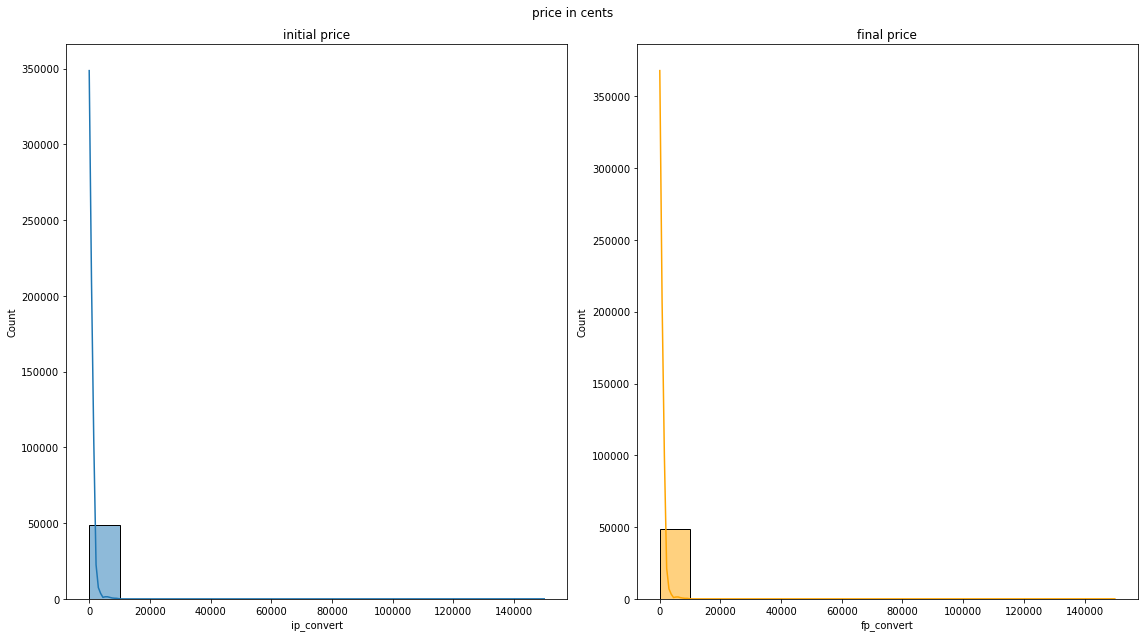

In [45]:
# look at initial and final price after conversion
multiple_histogram(1,2,['ip_convert', 'fp_convert'], ['initial price', 'final price'], df_price_eda, 'price in cents', [None, 'orange'])

We see that the price between the initial and final are mostly similar to each other, suggesting that the games that are on discount during the point of collection are minimal to create a large discrepency between the data. We will split the graph in to 3 based on the final price: 
1) More than SGD 0 but less than SGD 10
2) More than SGD 10 but less than SGD 100
3) More than SGD 100

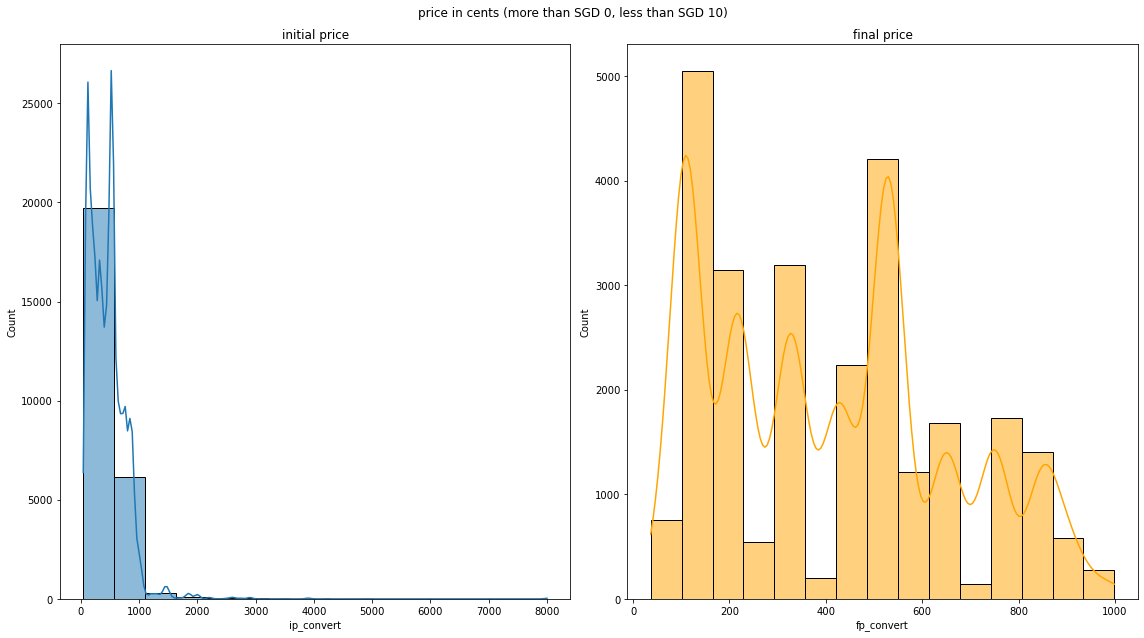

In [46]:
# look at initial and final price after conversion
multiple_histogram(1,2,['ip_convert', 'fp_convert'], ['initial price', 'final price'], 
                   df_price_eda[(df_price_eda['fp_convert']>0) & (df_price_eda['fp_convert']<1000)], 
                   'price in cents (more than SGD 0, less than SGD 10)', [None, 'orange'])

We see that some of the games after discount were less than SGD 10, making such games worth users to purchase. 

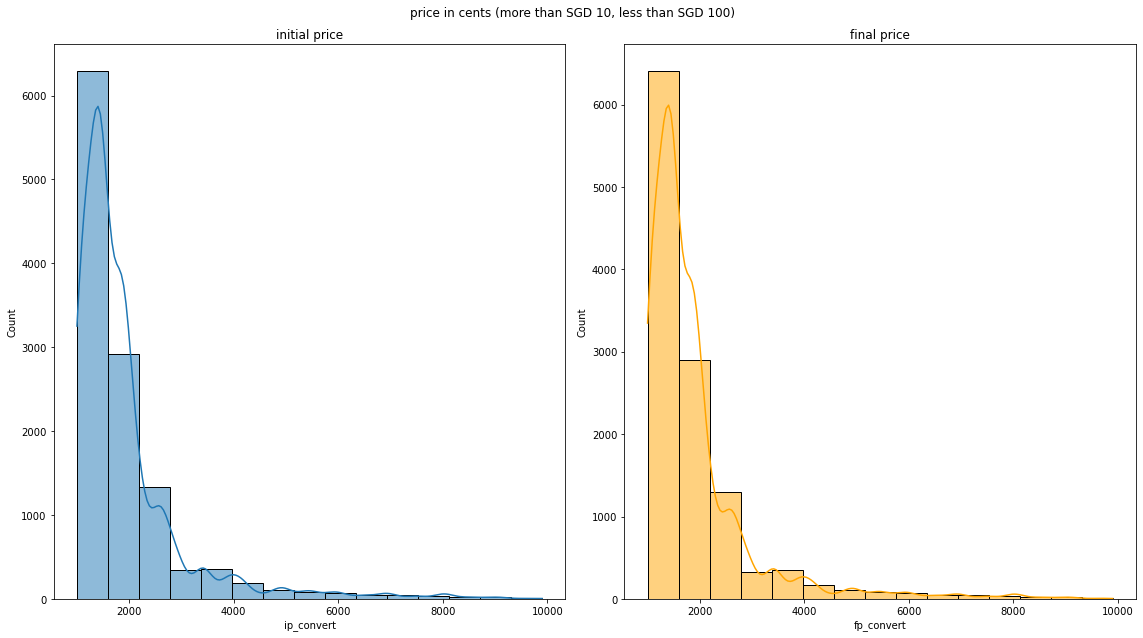

In [47]:
# look at initial and final price after conversion
multiple_histogram(1,2,['ip_convert', 'fp_convert'], ['initial price', 'final price'], 
                   df_price_eda[(df_price_eda['fp_convert']>1000) & (df_price_eda['fp_convert']<10000)], 
                   'price in cents (more than SGD 10, less than SGD 100)', [None, 'orange'])

The spread of the data seems to be similar, suggesting these games are either not on discount or discount are minimal. 

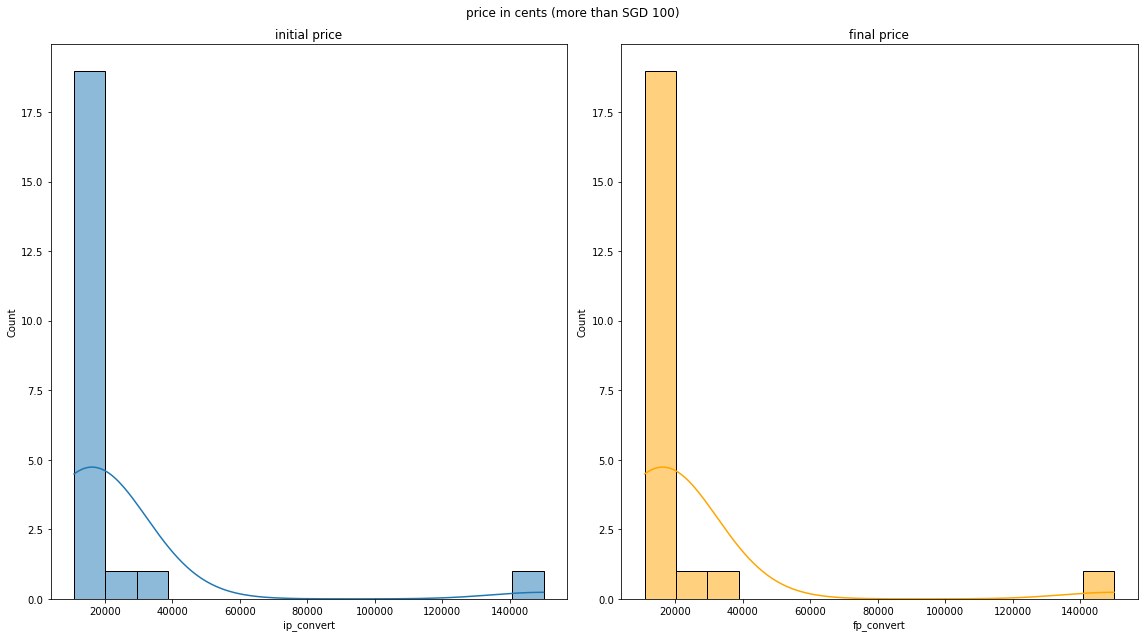

In [48]:
# look at initial and final price after conversion
multiple_histogram(1,2,['ip_convert', 'fp_convert'], ['initial price', 'final price'], 
                   df_price_eda[df_price_eda['fp_convert']>10000], 'price in cents (more than SGD 100)', [None, 'orange'])

We see that there are a handful of games that are pricey, costing more than SGD 100. 

### statistics

Now, we will look at the games' statistics.

In [49]:
sql_query = '''
SELECT *
FROM statistics
'''

pd.read_sql(sql_query, con).head()

,steam_appid,average_2weeks,average_forever,ccu,median_2weeks,median_forever,negative,positive,userscore,min_owners,max_owners,review_score,review_percent
0,10.0,212.0,8690.0,16837.0,116.0,239.0,4944.0,193192.0,0.0,10000000,20000000,188248.0,3.966456
1,20.0,0.0,2752.0,77.0,0.0,16.0,896.0,5416.0,0.0,5000000,10000000,4520.0,0.095238
2,30.0,0.0,4250.0,139.0,0.0,28.0,557.0,5007.0,0.0,5000000,10000000,4450.0,0.093763
3,40.0,0.0,5083.0,5.0,0.0,7.0,412.0,1854.0,0.0,5000000,10000000,1442.0,0.030383
4,50.0,0.0,3223.0,139.0,0.0,156.0,664.0,13298.0,0.0,5000000,10000000,12634.0,0.266203


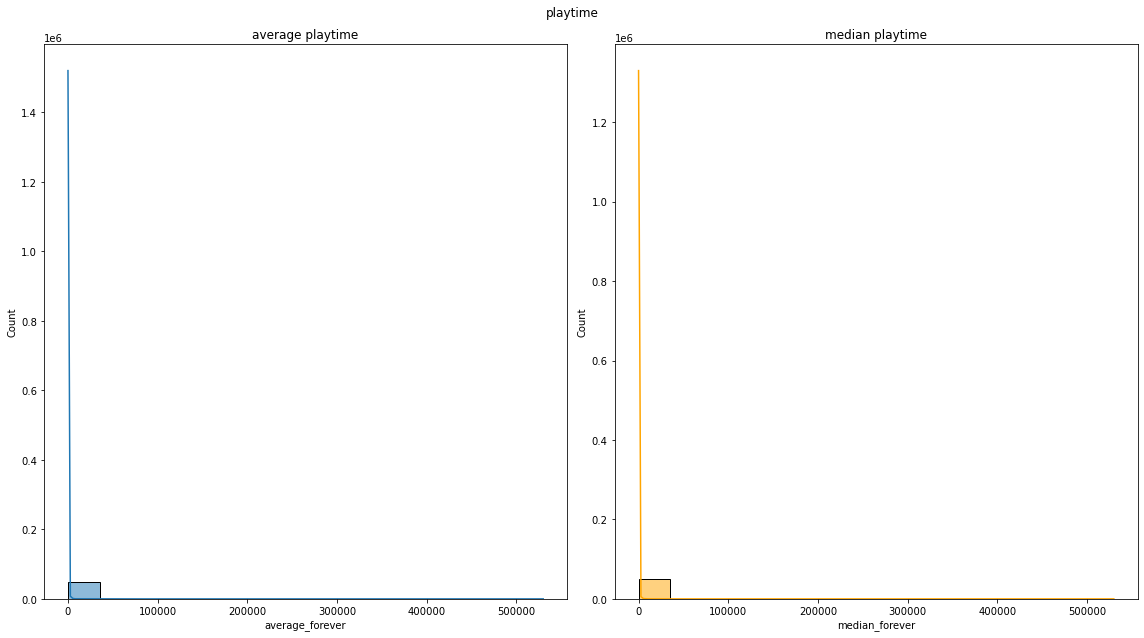

In [50]:
# look at playtime
multiple_histogram(1,2,['average_forever', 'median_forever'], ['average playtime', 'median playtime'], pd.read_sql(sql_query, con), 'playtime', [None, 'orange'])

We see that the playtime is about the same for average and median. 

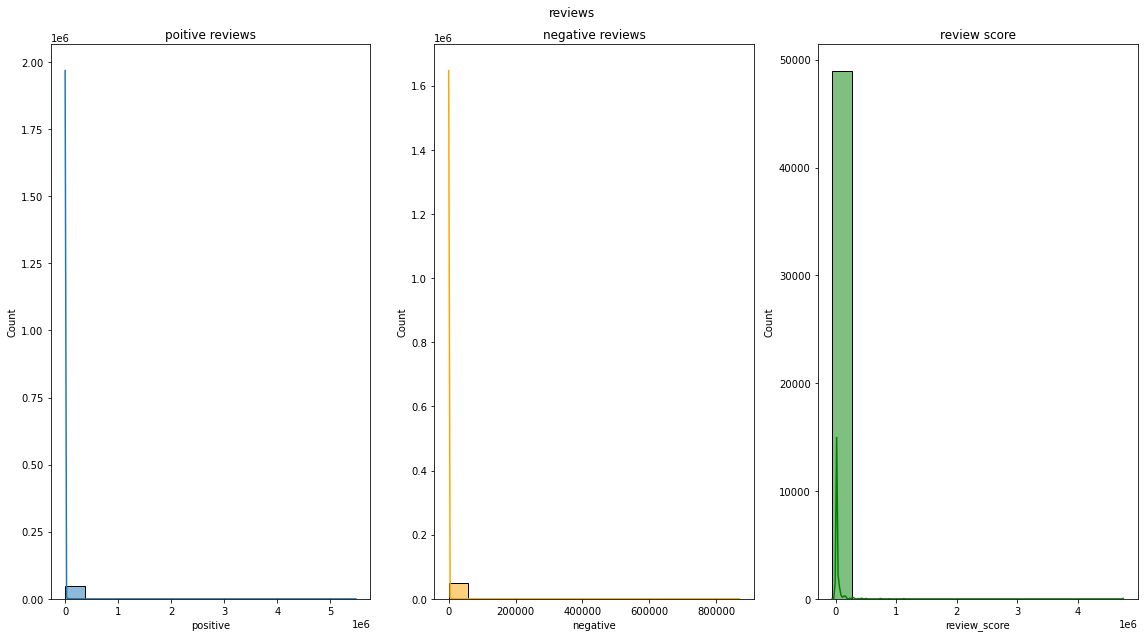

In [51]:
# look at number of reviews
multiple_histogram(1,3,['positive', 'negative', 'review_score'], ['poitive reviews', 'negative reviews', 'review score'], pd.read_sql(sql_query, con), 'reviews', [None, 'orange', 'green'])

We see that the number of positive reviews are much higher than negative. 

### `media`

Now we will look at the number of graphics the game has. 

In [52]:
sql_query = '''
SELECT *
FROM media
LIMIT 5
'''

pd.read_sql(sql_query, con)

,steam_appid,header_image,has_movies,num_movies,has_screenshots,num_screenshots
0,10.0,https://cdn.akamai.steamstatic.com/steam/apps/10/header.jpg?t=1602535893,0,0,1,13
1,20.0,https://cdn.akamai.steamstatic.com/steam/apps/20/header.jpg?t=1579634708,0,0,1,5
2,30.0,https://cdn.akamai.steamstatic.com/steam/apps/30/header.jpg?t=1512413490,0,0,1,5
3,40.0,https://cdn.akamai.steamstatic.com/steam/apps/40/header.jpg?t=1568752159,0,0,1,4
4,50.0,https://cdn.akamai.steamstatic.com/steam/apps/50/header.jpg?t=1579628243,0,0,1,5


In [53]:
sql_query = '''
SELECT COUNT(*) as count
FROM media
GROUP BY 
'''

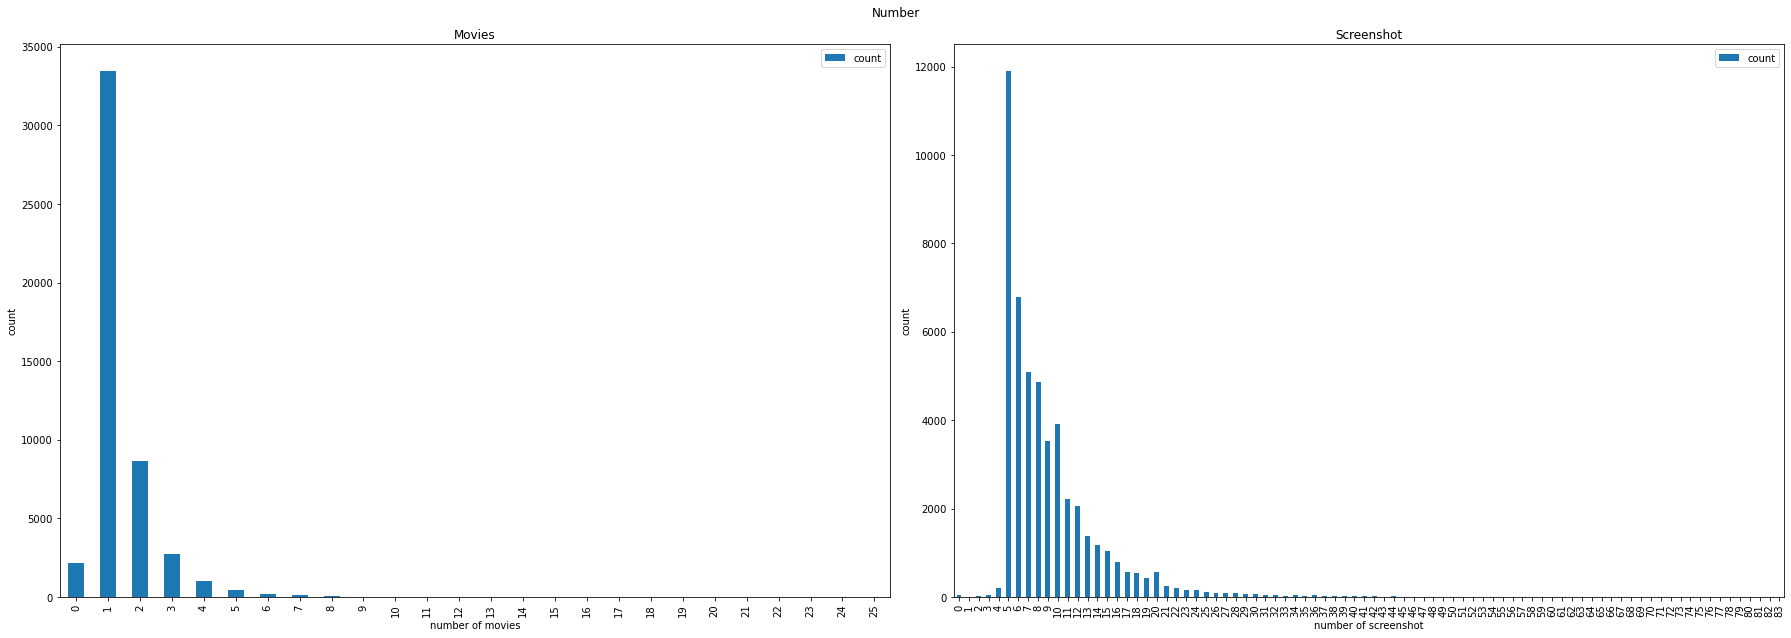

In [54]:
# Number of movies or screenshots
fig, axes = plt.subplots(1, 2, figsize=(25,9))
fig.suptitle('Number')

p1 = pd.read_sql(sql_query+'num_movies', con).plot(ax = axes[0], kind='bar', xlabel='number of movies', ylabel='count', legend=True)
axes[0].set_title('Movies')

pd.read_sql(sql_query+'num_screenshots', con).plot(ax = axes[1], kind='bar', xlabel='number of screenshot', ylabel='count', legend=True)
axes[1].set_title('Screenshot')

# adjust the graph layout
plt.tight_layout() 
    
# show the graph
plt.show();

We see that the distribution are similar between both the movies and screenshots, even though the number of movies is appears to be smaller than for screenshots. The games have a majority of 5 screenshots and 1 movie to advertise the game when users reaches their page. 

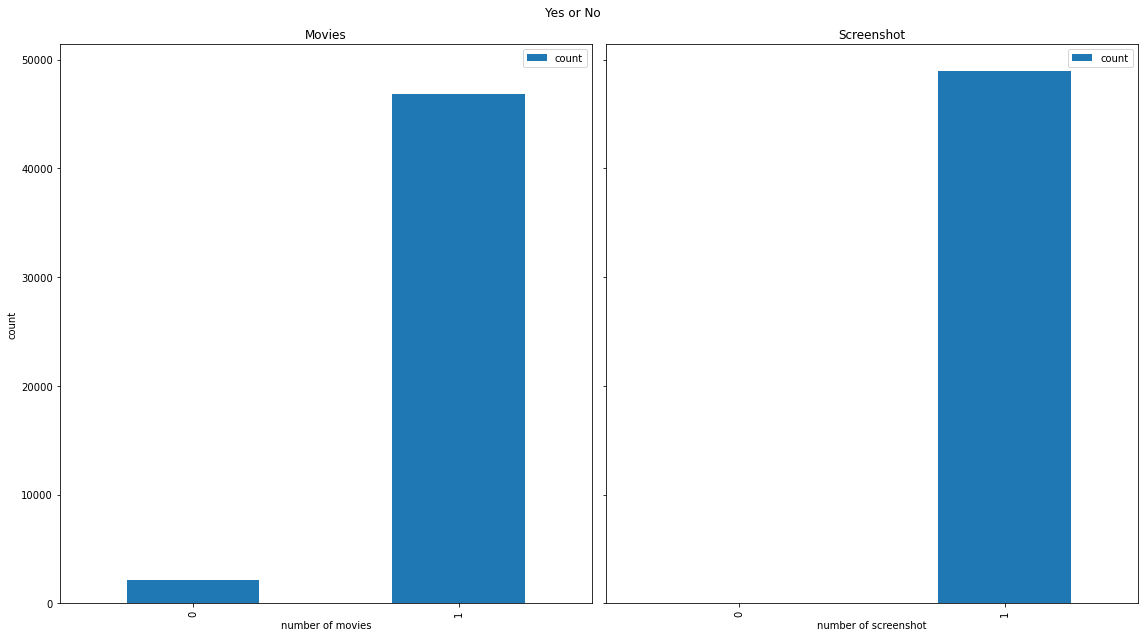

In [55]:
# Have movies or screenshots
fig, axes = plt.subplots(1, 2, figsize=(16,9), sharey=True)
fig.suptitle('Yes or No')

p1 = pd.read_sql(sql_query+'has_movies', con).plot(ax = axes[0], kind='bar', xlabel='number of movies', ylabel='count', legend=True)
axes[0].set_title('Movies')

pd.read_sql(sql_query+'has_screenshots', con).plot(ax = axes[1], kind='bar', xlabel='number of screenshot', ylabel='count', legend=True)
axes[1].set_title('Screenshot')

# adjust the graph layout
plt.tight_layout() 
    
# show the graph
plt.show();

We see that most of the games have screenshots and more games has screenshots compared to movies. 

### `requirements`

We will now look at the requirements for the games. 

In [56]:
sql_query = '''
SELECT *
FROM requirements
LIMIT 5
'''

pd.read_sql(sql_query, con)

,steam_appid,required_age,min_linux_requirements,linux_platform,min_mac_requirements,mac_platform,min_pc_requirements,windows_platform
0,10.0,0.0,"Minimum: Linux Ubuntu 12.04, Dual-core from Intel or AMD at 2.8 GHz, 1GB Memory, nVidia GeForce 8600/9600GT, ATI/AMD Radeaon HD2600/3600 (Graphic Drivers: nVidia 310, AMD 12.11), OpenGL 2.1, 4GB Hard Drive Space, OpenAL Compatible Sound Card",1,"Minimum: OS X Snow Leopard 10.6.3, 1GB RAM, 4GB Hard Drive Space,NVIDIA GeForce 8 or higher, ATI X1600 or higher, or Intel HD 3000 or higher Mouse, Keyboard, Internet Connection",1,"Minimum: 500 mhz processor, 96mb ram, 16mb video card, Windows XP, Mouse, Keyboard, Internet ConnectionRecommended: 800 mhz processor, 128mb ram, 32mb+ video card, Windows XP, Mouse, Keyboard, Internet Connection",1
1,20.0,0.0,"Minimum: Linux Ubuntu 12.04, Dual-core from Intel or AMD at 2.8 GHz, 1GB Memory, nVidia GeForce 8600/9600GT, ATI/AMD Radeaon HD2600/3600 (Graphic Drivers: nVidia 310, AMD 12.11), OpenGL 2.1, 4GB Hard Drive Space, OpenAL Compatible Sound Card",1,"Minimum: OS X Snow Leopard 10.6.3, 1GB RAM, 4GB Hard Drive Space,NVIDIA GeForce 8 or higher, ATI X1600 or higher, or Intel HD 3000 or higher Mouse, Keyboard, Internet Connection",1,"Minimum: 500 mhz processor, 96mb ram, 16mb video card, Windows XP, Mouse, Keyboard, Internet ConnectionRecommended: 800 mhz processor, 128mb ram, 32mb+ video card, Windows XP, Mouse, Keyboard, Internet Connection",1
2,30.0,0.0,"Minimum: Linux Ubuntu 12.04, Dual-core from Intel or AMD at 2.8 GHz, 1GB Memory, nVidia GeForce 8600/9600GT, ATI/AMD Radeaon HD2600/3600 (Graphic Drivers: nVidia 310, AMD 12.11), OpenGL 2.1, 4GB Hard Drive Space, OpenAL Compatible Sound Card",1,"Minimum: OS X Snow Leopard 10.6.3, 1GB RAM, 4GB Hard Drive Space,NVIDIA GeForce 8 or higher, ATI X1600 or higher, or Intel HD 3000 or higher Mouse, Keyboard, Internet Connection",1,"Minimum: 500 mhz processor, 96mb ram, 16mb video card, Windows XP, Mouse, Keyboard, Internet ConnectionRecommended: 800 mhz processor, 128mb ram, 32mb+ video card, Windows XP, Mouse, Keyboard, Internet Connection",1
3,40.0,0.0,"Minimum: Linux Ubuntu 12.04, Dual-core from Intel or AMD at 2.8 GHz, 1GB Memory, nVidia GeForce 8600/9600GT, ATI/AMD Radeaon HD2600/3600 (Graphic Drivers: nVidia 310, AMD 12.11), OpenGL 2.1, 4GB Hard Drive Space, OpenAL Compatible Sound Card",1,"Minimum: OS X Snow Leopard 10.6.3, 1GB RAM, 4GB Hard Drive Space,NVIDIA GeForce 8 or higher, ATI X1600 or higher, or Intel HD 3000 or higher Mouse, Keyboard, Internet Connection",1,"Minimum: 500 mhz processor, 96mb ram, 16mb video card, Windows XP, Mouse, Keyboard, Internet ConnectionRecommended: 800 mhz processor, 128mb ram, 32mb+ video card, Windows XP, Mouse, Keyboard, Internet Connection",1
4,50.0,0.0,"Minimum: Linux Ubuntu 12.04, Dual-core from Intel or AMD at 2.8 GHz, 1GB Memory, nVidia GeForce 8600/9600GT, ATI/AMD Radeaon HD2600/3600 (Graphic Drivers: nVidia 310, AMD 12.11), OpenGL 2.1, 4GB Hard Drive Space, OpenAL Compatible Sound Card",1,"Minimum: OS X Snow Leopard 10.6.3, 1GB RAM, 4GB Hard Drive Space,NVIDIA GeForce 8 or higher, ATI X1600 or higher, or Intel HD 3000 or higher Mouse, Keyboard, Internet Connection",1,"Minimum: 500 mhz processor, 96mb ram, 16mb video card, Windows XP, Mouse, Keyboard, Internet ConnectionRecommended: 800 mhz processor, 128mb ram, 32mb+ video card, Windows XP, Mouse, Keyboard, Internet Connection",1


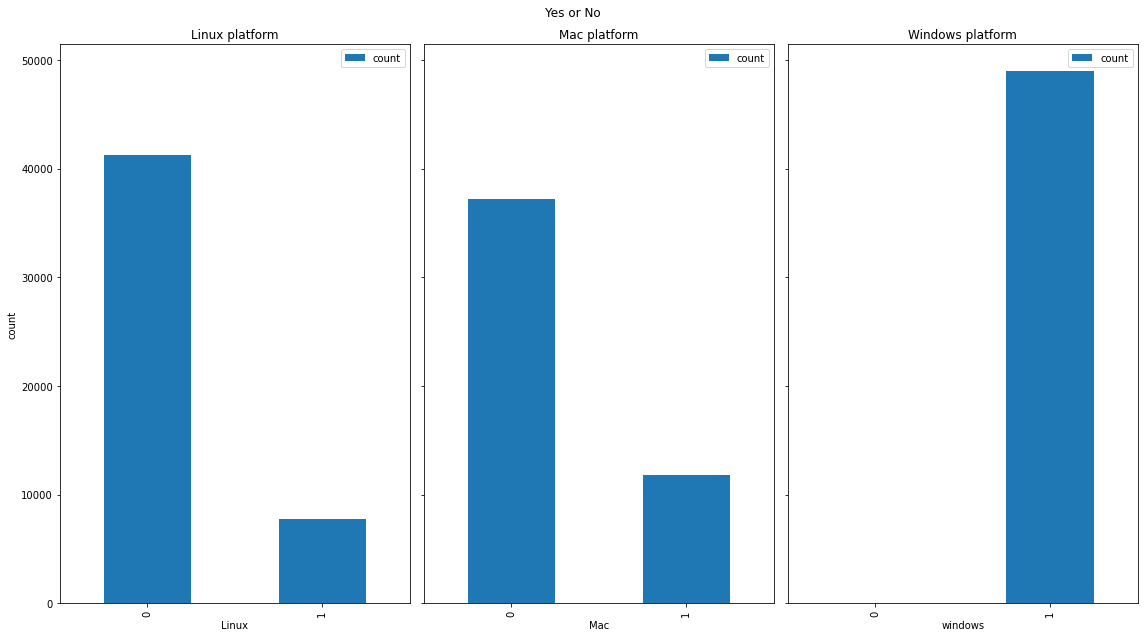

In [57]:
sql_query = '''
SELECT COUNT(*) AS count
FROM requirements
GROUP BY 
'''

# platform
fig, axes = plt.subplots(1, 3, figsize=(16,9), sharey=True)
fig.suptitle('Yes or No')

p1 = pd.read_sql(sql_query+'linux_platform', con).plot(ax = axes[0], kind='bar', xlabel='Linux', ylabel='count', legend=True)
axes[0].set_title('Linux platform')

pd.read_sql(sql_query+'mac_platform', con).plot(ax = axes[1], kind='bar', xlabel='Mac', ylabel='count', legend=True)
axes[1].set_title('Mac platform')

pd.read_sql(sql_query+'windows_platform', con).plot(ax = axes[2], kind='bar', xlabel='windows', ylabel='count', legend=True)
axes[2].set_title('Windows platform')

# adjust the graph layout
plt.tight_layout() 
    
# show the graph
plt.show();

We see that there is most of the games are compatible on Windows platform. Comparing between Mac and Linux, we see that more games are compatible on Mac platform compared to Windows platform. 

### `language`

Lets us look at the common language for the games. 

In [58]:
sql_query = '''
SELECT *
FROM language
'''

pd.read_sql(sql_query, con).head()

,steam_appid,languages,arabic,bulgarian,czech,danish,dutch,english,finnish,french,german,greek,hungarian,italian,japanese,korean,norwegian,notsupported,polish,portuguese,portuguese-brazil,romanian,russian,simplifiedchinese,slovakian,spanish,spanish-latinamerica,spanish-spain,swedish,thai,traditionalchinese,turkish,ukrainian,vietnamese
0,10.0,"english,french,german,italian,spanish-spain,simplifiedchinese,traditionalchinese,korean",0,0,0,0,0,1,0,1,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0
1,20.0,"english,french,german,italian,spanish-spain,korean,russian,simplifiedchinese,traditionalchinese",0,0,0,0,0,1,0,1,1,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0
2,30.0,"english,french,german,italian,spanish-spain",0,0,0,0,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,40.0,"english,french,german,italian,spanish-spain,korean,russian,simplifiedchinese,traditionalchinese",0,0,0,0,0,1,0,1,1,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0
4,50.0,"english,french,german,korean",0,0,0,0,0,1,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


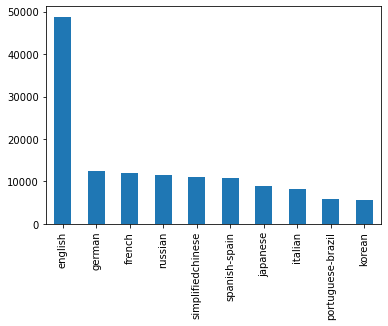

In [60]:
# see top 10 languages
pd.DataFrame(pd.read_sql(sql_query, con).drop(columns={'steam_appid', 'languages'}).sum()).sort_values(by=0, ascending=False).head(10).plot(kind='bar', legend=False);

We see that most of the games can be played in English, followed by German and French. 

### `tag`

Let us look at the tags for the sample. 

In [61]:
sql_query = '''
SELECT *
FROM tag
'''

pd.read_sql(sql_query, con).head()

,steam_appid,Action,FPS,Multiplayer,Shooter,Classic,Team-Based,First-Person,Competitive,Tactical,1990's,e-sports,PvP,Old School,Military,Strategy,Survival,Score Attack,1980s,Assassin,Violent,Hero Shooter,Class-Based,Co-op,Fast-Paced,...,Escape Room,Spelling,Roguelike Deckbuilder,Action RTS,VR Only,Skateboarding,Battle Royale,Wrestling,Steam Machine,Hockey,Boss Rush,Social Deduction,Baseball,Jet,Asymmetric VR,Faith,BMX,Hardware,Foreign,Electronic,360 Video,8-bit Music,Rock Music,Instrumental Music,Masterpiece
0,10.0,5379.0,4801.0,3362.0,3327.0,2758.0,1844.0,1692.0,1588.0,1323.0,1181.0,1173.0,865.0,751.0,623.0,604.0,296.0,285.0,256.0,223.0,65.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
1,20.0,745.0,306.0,257.0,206.0,232.0,188.0,169.0,68.0,-9999.0,132.0,-9999.0,-9999.0,106.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,45.0,213.0,181.0,89.0,61.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
2,30.0,160.0,788.0,202.0,188.0,126.0,131.0,105.0,-9999.0,40.0,-9999.0,-9999.0,-9999.0,16.0,64.0,13.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,77.0,34.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
3,40.0,629.0,139.0,96.0,94.0,107.0,-9999.0,70.0,23.0,-9999.0,8.0,-9999.0,-9999.0,33.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,13.0,15.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
4,50.0,322.0,881.0,-9999.0,220.0,251.0,-9999.0,187.0,-9999.0,-9999.0,133.0,-9999.0,-9999.0,-9999.0,91.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,31.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0


Instead of getting the number of users who made the tag, we will see whether does this game has this tag being identified. To do this, we will need to create a dataframe and reassign the values within. 

In [62]:
# create dataframe
df_tag = pd.read_sql(sql_query, con)

# create list of columns that will be affected in the replacing for tag
list_tag_temp = list(df_tag.columns)
list_tag_temp.remove("steam_appid")

# replace the values in tag
for col in list_tag_temp:
    df_tag[col] = df_tag[col].apply(lambda x: 0 if x == -9999 else 1)
    
# look at the data
df_tag.head()

,steam_appid,Action,FPS,Multiplayer,Shooter,Classic,Team-Based,First-Person,Competitive,Tactical,1990's,e-sports,PvP,Old School,Military,Strategy,Survival,Score Attack,1980s,Assassin,Violent,Hero Shooter,Class-Based,Co-op,Fast-Paced,...,Escape Room,Spelling,Roguelike Deckbuilder,Action RTS,VR Only,Skateboarding,Battle Royale,Wrestling,Steam Machine,Hockey,Boss Rush,Social Deduction,Baseball,Jet,Asymmetric VR,Faith,BMX,Hardware,Foreign,Electronic,360 Video,8-bit Music,Rock Music,Instrumental Music,Masterpiece
0,10.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,20.0,1,1,1,1,1,1,1,1,0,1,0,0,1,0,0,0,0,0,0,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,30.0,1,1,1,1,1,1,1,0,1,0,0,0,1,1,1,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,40.0,1,1,1,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,50.0,1,1,0,1,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


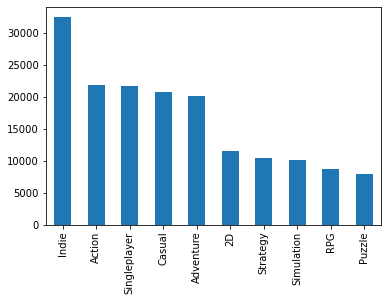

In [64]:
# see top 10 tags
pd.DataFrame(df_tag.drop(columns={"steam_appid"}).sum()).sort_values(by=0, ascending=False).head(10).plot(kind='bar', legend=False);

We see that most of the games were tagged as Indie, followed by Action and Single player games. 

---

## Conclusion

With this, we have roughly looked at all the columns that we have from all the tables. We see that for columns that had high (or slight high) correlation, the data does look similar to each other. 

Other observation includes 
- top 2 tags selected by users matches with the genre
- most games are playable in English language
- most games are playable on Windows platform
- Games will usually have movies to act as their promotional videos and screenshots on the games page to promote the game. 

---

## Further recommendations

Here are some steps that we can take if we would like to further refine the subject. 

- Relook at `statistics` table and come up with a model to perform analysis. 